<a href="https://colab.research.google.com/github/YesidCastelblanco/Dataset_clientes_mora/blob/main/Taller_Analisis_Bivariado_Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## **Taller Analisis Bivariado**

---



El analisis bivariado es muy importante en la ciencia de datos porque nos permite entender y explorar una relación existente entre 2 variables del dataset, buscando una correlación que nos lleve a identificar en que medida se encuentran relacionadas.

Podemos detectar tendencias y patrones en los datos analizados mediante gráficos de barras, dispersión, entre otros, esto para visualizar como cambia una variable en relación con otra lo cual nos puede acercar a tendencias, anomalias presentes en la información consultada.

Debemos desarrollar modelos predictivos para identificar que variables tienen una fuerte relación con la variable objetivo.

Analizar como las variables se relacionan entre si, ayuda a confirmar el tipo de modelo a construir, por ejemplo, una regresión lineal, regresión logística, entre otros modelos.


---





---


***Dataset CLIENTES EN ESTADO DE MORA AÑO 2022- 2024***


---






Trabajaremos con un archivo CSV el cual contiene información de clientes de una entidad financiera que se encuentran con un estado de mora.

Se evidencia un problema importante por el alto volumen de cartera castigada lo cual ha venido incrementando año tras año y se desea conocer que variables influyen en ese comportamiento.

En este archivo encontraremos datos financieros como es el total de los ingresos,egresos, saldos del cliente, plazo del credito, dias de mora,categoria de mora,igualmente, datos basicos del cliente como es el estado civil, sexo, tipo de vivienda, edad y personas a cargo.  


---




***PASO A PASO ANALISIS BIVARIADO***


---



In [135]:
# Importamos las bibliotecas necesarias para el analisis exploratorio

# Biblioteca para manipulación y análisis de datos estructurados
import pandas as pd

# Biblioteca para cálculos numéricos y manipulación de datos
import numpy as np

# Biblioteca para la creación de gráficos básicos y visualizaciones de datos
import matplotlib.pyplot as plt

# Proporciona una interfaz de alto nivel para crear gráficos estadísticos y más complejos
import seaborn as sns

# Útiles para evaluar el rendimiento de un modelo de clasificación
from sklearn.metrics import accuracy_score, confusion_matrix

# Modelo lineal de regresión logística que se utiliza para predecir la probabilidad de una clase o evento en función de una o más variables independientes
from sklearn.linear_model import LogisticRegression

# Se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Se utiliza para imputar valores faltantes en un conjunto de datos
from sklearn.impute import KNNImputer




---


***CARGAMOS ARCHIVO CSV SIN ENCABEZADO***


---



In [136]:
# Leer un archivo CSV y cargarlo en un DataFrame de Pandas

df = pd.read_csv('https://raw.githubusercontent.com/YesidCastelblanco/Dataset_clientes_mora/main/Dataset_mora.csv')



---


***CREAMOS EL ENCABEZADO PARA CADA UNA DE LAS VARIABLES A UTILIZAR***


---



In [137]:
# Definimos los encabezados del Dataset

headers = ["SEXO","ESTADO_CIVIL","VIVIENDA","EDAD","INGRESOS","EGRESOS","DEPENDIENTES","PLAZO","SALDO_CREDITO","MORA","CLASIFICACION_MORA"]

df.columns = headers

print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI



---


**Consultamos las primeras (#) filas del dataset**


---



In [46]:

df.head(10)


,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
0,MUJER,SOLTERO,FAMILIAR,47,4966896,4000000,0,72,41220000,481,D
1,HOMBRE,CASADO,PROPIA,33,16213150,2000000,0,72,198900000,24,A
2,MUJER,SOLTERO,FAMILIAR,43,1342547,12908,0,122,44300000,555,E
3,HOMBRE,UNION LIBRE,FAMILIAR,54,3106656,18717162,0,61,308081700,53,D
4,HOMBRE,SOLTERO,FAMILIAR,31,200000000,2000000,1,60,121120000,22,A
5,HOMBRE,CASADO,PROPIA,46,7640000,4500000,0,48,35300000,480,E
6,HOMBRE,UNION LIBRE,FAMILIAR,37,2266188,1163135,0,140,73100000,433,E
7,HOMBRE,SOLTERO,PROPIA,47,4247963,2053349,1,140,200000000,36,A
8,HOMBRE,CASADO,PROPIA,63,761428,201322,0,60,23965000,204,E
9,HOMBRE,CASADO,PROPIA,72,3539425,1969776,0,60,12147000,449,E


---


**Consultamos las ultimas (#) filas del dataset**


---

In [47]:

df.tail(10)

,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
586,HOMBRE,SOLTERO,FAMILIAR,38,2306507,791406,0,120,79500000,463,E
587,MUJER,SOLTERO,PROPIA,60,1069192,352448,0,120,48000000,36,A
588,MUJER,SEPARADO,FAMILIAR,60,2425592,1332126,0,140,102000000,341,E
589,MUJER,CASADO,PROPIA,48,3480000,31360000,0,72,168000000,80,D
590,MUJER,SOLTERO,FAMILIAR,52,2671586,967636,0,120,50000000,645,E
591,MUJER,SOLTERO,FAMILIAR,65,3094027,310000,0,60,27000000,475,E
592,HOMBRE,SOLTERO,FAMILIAR,33,2010394,723341,0,140,59700000,158,D
593,MUJER,SOLTERO,FAMILIAR,50,1791871,988381,0,140,57000000,67,B
594,HOMBRE,SOLTERO,FAMILIAR,35,2153146,1084469,0,140,75000000,614,E
595,HOMBRE,SOLTERO,PROPIA,31,1977665,1173382,0,140,51500000,280,E




---


***CONSULTAMOS EL TIPO DE DATOS DE LAS VARIABLES DEL DATAFRAME***


---



In [138]:
# Consultamos los tipos de datos de las variables en el DataFrame para poder decidir métodos adecuados para la visualización de los datos mediante analisis bivariado

df.dtypes

# Int64 = Tipo de dato entero de 64 bits
# Object = Datos de texto, cadenas de caracteres, datos mixtos

,0
SEXO,object
ESTADO_CIVIL,object
VIVIENDA,object
EDAD,int64
INGRESOS,int64
...,...
DEPENDIENTES,int64
PLAZO,int64
SALDO_CREDITO,int64
MORA,int64




---


***VISUALIZACIÓN DE LOS DATOS DEL DATAFRAME***



---




In [139]:
# Resumen del Dataframe útil para depuración y comprensión inicial de los datos
# Podemos ver cuántos valores no nulos hay en cada columna lo que ayuda a identificar la presencia de valores faltantes.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SEXO                596 non-null    object
 1   ESTADO_CIVIL        595 non-null    object
 2   VIVIENDA            592 non-null    object
 3   EDAD                596 non-null    int64 
 4   INGRESOS            596 non-null    int64 
 5   EGRESOS             596 non-null    int64 
 6   DEPENDIENTES        596 non-null    int64 
 7   PLAZO               596 non-null    int64 
 8   SALDO_CREDITO       596 non-null    int64 
 9   MORA                596 non-null    int64 
 10  CLASIFICACION_MORA  596 non-null    object
dtypes: int64(7), object(4)
memory usage: 51.3+ KB




---


***Caracteristicas estadisticas del dataframe***


---



In [86]:
# Mostrar caracteristicas estadísticas de los datos en un DataFrame para identificar anomalias o patrones

df.describe()

# count: Número de valores no nulos en la columna
# mean: Media de los valores en la columna
# std: Desviación estándar de los valores en la columna
# min: Valor mínimo en la columna
# 25%: Primer cuartil (25th percentile)
# 50%: Mediana (50th percentile)
# 75%: Tercer cuartil (75th percentile)
# max: Valor máximo en la columna


,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA
count,596.000000,5.960000e+02,5.960000e+02,596.000000,596.000000,5.960000e+02,596.000000
mean,45.573826,1.573884e+07,9.379276e+06,0.362416,95.771812,7.155391e+07,287.793624
std,12.503831,1.476983e+08,7.207173e+07,4.389008,39.814844,1.714423e+08,268.505154
min,14.000000,0.000000e+00,0.000000e+00,0.000000,18.000000,1.966634e+06,1.000000
25%,36.000000,1.559405e+06,5.116410e+05,0.000000,60.000000,3.000000e+07,36.000000
50%,43.000000,2.137788e+06,1.000000e+06,0.000000,74.500000,5.548337e+07,218.000000
75%,53.000000,3.499719e+06,1.527788e+06,0.000000,140.000000,7.807500e+07,494.000000
max,83.000000,2.764298e+09,1.183283e+09,99.000000,225.000000,4.000000e+09,934.000000


---


***Caracteristicas estadisticas del dataframe por columna***


---

In [140]:
# Analizamos cada una de las variables descriptivas

print(df['SEXO'].describe())
print(df['ESTADO_CIVIL'].describe())
print(df['VIVIENDA'].describe())
print(df['EDAD'].describe())
print(df['INGRESOS'].describe())
print(df['EGRESOS'].describe())
print(df['DEPENDIENTES'].describe())
print(df['PLAZO'].describe())
print(df['SALDO_CREDITO'].describe())
print(df['MORA'].describe())
print(df['CLASIFICACION_MORA'].describe())

# PARA CADENAS DE TEXTO:

# unique: valores unicos
# top: valores mas comunes, los que mas se repiten
# freq: frecuencia de los valores mas comunes


count        596
unique         2
top       HOMBRE
freq         430
Name: SEXO, dtype: object
count         595
unique          7
top       SOLTERO
freq          270
Name: ESTADO_CIVIL, dtype: object
count          592
unique           3
top       FAMILIAR
freq           311
Name: VIVIENDA, dtype: object
count    596.000000
mean      45.573826
std       12.503831
min       14.000000
25%       36.000000
50%       43.000000
75%       53.000000
max       83.000000
Name: EDAD, dtype: float64
count    5.960000e+02
mean     1.573884e+07
std      1.476983e+08
min      0.000000e+00
25%      1.559405e+06
50%      2.137788e+06
75%      3.499719e+06
max      2.764298e+09
Name: INGRESOS, dtype: float64
count    5.960000e+02
mean     9.379276e+06
std      7.207173e+07
min      0.000000e+00
25%      5.116410e+05
50%      1.000000e+06
75%      1.527788e+06
max      1.183283e+09
Name: EGRESOS, dtype: float64
count    596.000000
mean       0.362416
std        4.389008
min        0.000000
25%        0.0



---


***NUMERO DE COLUMNAS Y NUMERO DE FILAS DEL DATAFRAME***


---



In [52]:
# Obtener información sobre dimensiones de un DataFrame

df.shape

# (filas, columnas)


(596, 11)



---


***LIMPIEZA DE LOS DATOS***


---



***Valores perdidos***


---



identificamos donde se encuentran los valores perdidos y cual es el mejor método para tratarlos.

Podemos tratar estos valores perdidos por medio de tecnicas de imputación

Imputación de datos: sustituir los valores perdidos empleando: media, mediana o moda.


In [13]:
# Primero vamos a contar los valores no numéricos dentro del campo MORA

# Esta validación sólo funciona con cadenas (strings). Como la columna es numérica, tenemos que convertirla a cadena:

df['MORA'] = df['MORA'].astype(str)

# después de convertir los datos del campo MORA en Strings, podemos realizar la validación de los campos no numéricos

df['MORA'].str.isnumeric().value_counts()



,count
MORA,
True,596




---


***CALCULAMOS LA MEDIA PARA ASIGNARLE A CAMPO QUE CONTIENE DATOS INCORRECTOS***


---



In [14]:
# Calcular la media de los valores numéricos

# Filtrar los valores diferentes de '?'
MORA = df['MORA'].loc[df['MORA'] != '?']

# Calcular la media de los valores numéricos
mmean = MORA.astype(int).mean()
print("La media de los valores numéricos es:", mmean)


La media de los valores numéricos es: 287.7936241610738




---


***Convertir a Tipo de Datos Correcto***


---



Después de calcular la media, si necesitas imputar valores en MORA, puedes reemplazar "?" con la media calculada y luego convertir la columna a un tipo de dato numérico.

En pandas utilizamos los métodos: .dtype() para ver los tipos de datos, y .astype() para cambiar tipos de datos. Tambien podemos utilizar pd.to_numeric para cambiar a número



In [15]:
# Reemplazar '?' con la media y convertir a entero

df['MORA'] = df['MORA'].replace('?', mmean)
df['MORA'] = pd.to_numeric(df['MORA'])

# Mostrar los primeros valores de la columna 'MORA'
print(df['MORA'].head())

0    481
1     24
2    555
3     53
4     22
Name: MORA, dtype: int64




---


***Igualmente, podemos reemplazar los valores "NaN"***


---



In [16]:
# Reemplazo de NaN por la media, columna MORA

df["MORA"].replace(np.nan, mmean, inplace=True)
df.head(10)

,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
0,MUJER,SOLTERO,FAMILIAR,47,4966896,4000000,0,72,41220000,481,D
1,HOMBRE,CASADO,PROPIA,33,16213150,2000000,0,72,198900000,24,A
2,MUJER,SOLTERO,FAMILIAR,43,1342547,12908,0,122,44300000,555,E
3,HOMBRE,UNION LIBRE,FAMILIAR,54,3106656,18717162,0,61,308081700,53,D
4,HOMBRE,SOLTERO,FAMILIAR,31,200000000,2000000,1,60,121120000,22,A
5,HOMBRE,CASADO,PROPIA,46,7640000,4500000,0,48,35300000,480,E
6,HOMBRE,UNION LIBRE,FAMILIAR,37,2266188,1163135,0,140,73100000,433,E
7,HOMBRE,SOLTERO,PROPIA,47,4247963,2053349,1,140,200000000,36,A
8,HOMBRE,CASADO,PROPIA,63,761428,201322,0,60,23965000,204,E
9,HOMBRE,CASADO,PROPIA,72,3539425,1969776,0,60,12147000,449,E




---


***Otros ejemplos de calculo de la media de los campos INGRESOS y EGRESOS***


---



In [17]:
# Media de las columnas INGRESOS y EGRESOS

# Media de la columna INGRESOS
INGRESOS = df["INGRESOS"].astype("float").mean()

# Media de la columna EGRESOS
EGRESOS = df["EGRESOS"].astype("float").mean()

# Imprimir los resultados
print("Promedio de ingresos:", INGRESOS)
print("Promedio de egresos:", EGRESOS)

Promedio de ingresos: 15738838.570469799
Promedio de egresos: 9379275.946308725




---


***Agrupar clientes por cantidad de mora***


---



In [18]:
# Primero, agrupamos el número de dias de mora

df['MORA'].value_counts()

,count
MORA,
5,65
36,22
767,14
97,14
433,13
...,...
251,1
60,1
471,1


---


***Frecuencia relativa (proporción) de cada valor en la columna***


---

In [19]:
# Calculamos las proporciones relativas de la columna MORA

Proporcion = df['MORA'].value_counts("normalize = True")
print(Proporcion)

MORA
5      0.109060
36     0.036913
767    0.023490
97     0.023490
433    0.021812
         ...   
251    0.001678
60     0.001678
471    0.001678
805    0.001678
475    0.001678
Name: proportion, Length: 237, dtype: float64


# ***IMPUTACIÓN AVANZADA***

Utilizamos técnicas más avanzadas como la imputación basada en k-vecinos más cercanos (KNN)



---


***Importamos y configuramos el Imputer***


---



In [21]:
# KNNImputer de sklearn para imputar valores nulos en la columna precio de tu DataFrame.
# Este es un enfoque útil cuando quieres utilizar la información de los valores vecinos para estimar los valores faltantes.

# n_neighbors: Especifica el número de vecinos más cercanos que se usarán para calcular el valor imputado. En tu caso, se están usando 5 vecinos.
# weights: Determina si se deben usar pesos uniformes o ponderar por la distancia.
# "uniform" significa que todos los vecinos tienen el mismo peso. También puedes usar "distance" para ponderar según la distancia.

# Aseguramos que el campo sea numérico:

# convierte cualquier valor no numérico a NaN antes de imputar. Utiliza pd.to_numeric con errors='coerce' para convertir valores no numéricos a NaN

df['MORA'] = pd.to_numeric(df['MORA'], errors='coerce')


In [22]:
# Creamos el imputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')




---


***Entrenamos el Imputer***


---



El imputer necesita al menos un valor válido para calcular la imputación. Asegúrate de que tu DataFrame df no contenga valores no numéricos o faltantes antes de aplicar fit.


In [23]:
# Entrenamos el modelo, ajustamos el imputer a los datos de la columna "MORA"

imputer.fit(df[["MORA"]])


KNNImputer()



---


***Imputar los valores Nulos***


---



Transformas los datos utilizando el imputer para reemplazar los valores nulos. El método transform devuelve una matriz, por lo que utilizas ravel() para convertirla en un vector plano y reemplazar los valores en la columna original.

In [25]:
# Reemplazamos los valores nulos en la columna "MORA"

df["MORA"] = imputer.transform(df[["MORA"]]).ravel()




---


***CONSULTA VALORES NULOS***


---



Después de imputar, verificamos que no hayan valores nulos restantes y que los datos sean coherentes.

Este enfoque te permitirá manejar los valores faltantes en la columna MORA de manera efectiva utilizando información de los vecinos más cercanos.

In [26]:
# Verificar si aún hay valores nulos
print(df["MORA"].isnull().sum())

# Verificar algunos valores
print(df["MORA"].head())

# Verificar si hay valores NaN restantes
print("Valores NaN en el DataFrame:")
print(df.isna().sum())


0
0    481.0
1     24.0
2    555.0
3     53.0
4     22.0
Name: MORA, dtype: float64
Valores NaN en el DataFrame:
SEXO                  0
ESTADO_CIVIL          1
VIVIENDA              4
EDAD                  0
INGRESOS              0
EGRESOS               0
DEPENDIENTES          0
PLAZO                 0
SALDO_CREDITO         0
MORA                  0
CLASIFICACION_MORA    0
dtype: int64




---


***Reemplazar caracteres especiales encontrados en el Dataframe***


---



Podemos realizar un reemplazo de caracteres especiales con la función replace, para hacer uso de la función es necesario tener cargada la libreria numpy

In [27]:
# Reemplaza todas las ocurrencias de "?" en el DataFrame df con np.nan.
# La opción inplace=True modifica el DataFrame directamente, sin necesidad de asignar el resultado a una nueva variable.


# Reemplazar "?" con np.nan

# Esto transformará el DataFrame para que los valores "?" sean tratados como datos faltantes (NaN)
df.replace("?", np.nan, inplace=True)

# Verificamos que los valores se hayan reemplazado correctamente:
print("\nDataFrame después de reemplazar '?' con NaN:")
print(df)



DataFrame después de reemplazar '?' con NaN:
       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382            



---


***Consultamos los valores perdidos:***


---



El código missing_data = df.isnull() en pandas se usa para identificar los valores faltantes (NaN) en un DataFrame

In [28]:
# df.isnull(): Devuelve un DataFrame del mismo tamaño que df, donde cada valor es True si el valor correspondiente en df es NaN o None, y False en caso contrario.
# missing_data = df.isnull(): Asigna el DataFrame de valores booleanos (True o False) a la variable missing_data

# True" significa valor perdido, "False" significa valor no perdido

missing_data = df.isnull()
print(missing_data)

      SEXO  ESTADO_CIVIL  VIVIENDA   EDAD  INGRESOS  EGRESOS  DEPENDIENTES  \
0    False         False     False  False     False    False         False   
1    False         False     False  False     False    False         False   
2    False         False     False  False     False    False         False   
3    False         False     False  False     False    False         False   
4    False         False     False  False     False    False         False   
..     ...           ...       ...    ...       ...      ...           ...   
591  False         False     False  False     False    False         False   
592  False         False     False  False     False    False         False   
593  False         False     False  False     False    False         False   
594  False         False     False  False     False    False         False   
595  False         False     False  False     False    False         False   

     PLAZO  SALDO_CREDITO   MORA  CLASIFICACION_MORA  
0    Fal

In [29]:
# Contamos los valores faltantes

missing_count = df.isnull().sum()
print(missing_count)


SEXO                  0
ESTADO_CIVIL          1
VIVIENDA              4
EDAD                  0
INGRESOS              0
EGRESOS               0
DEPENDIENTES          0
PLAZO                 0
SALDO_CREDITO         0
MORA                  0
CLASIFICACION_MORA    0
dtype: int64


<Axes: >

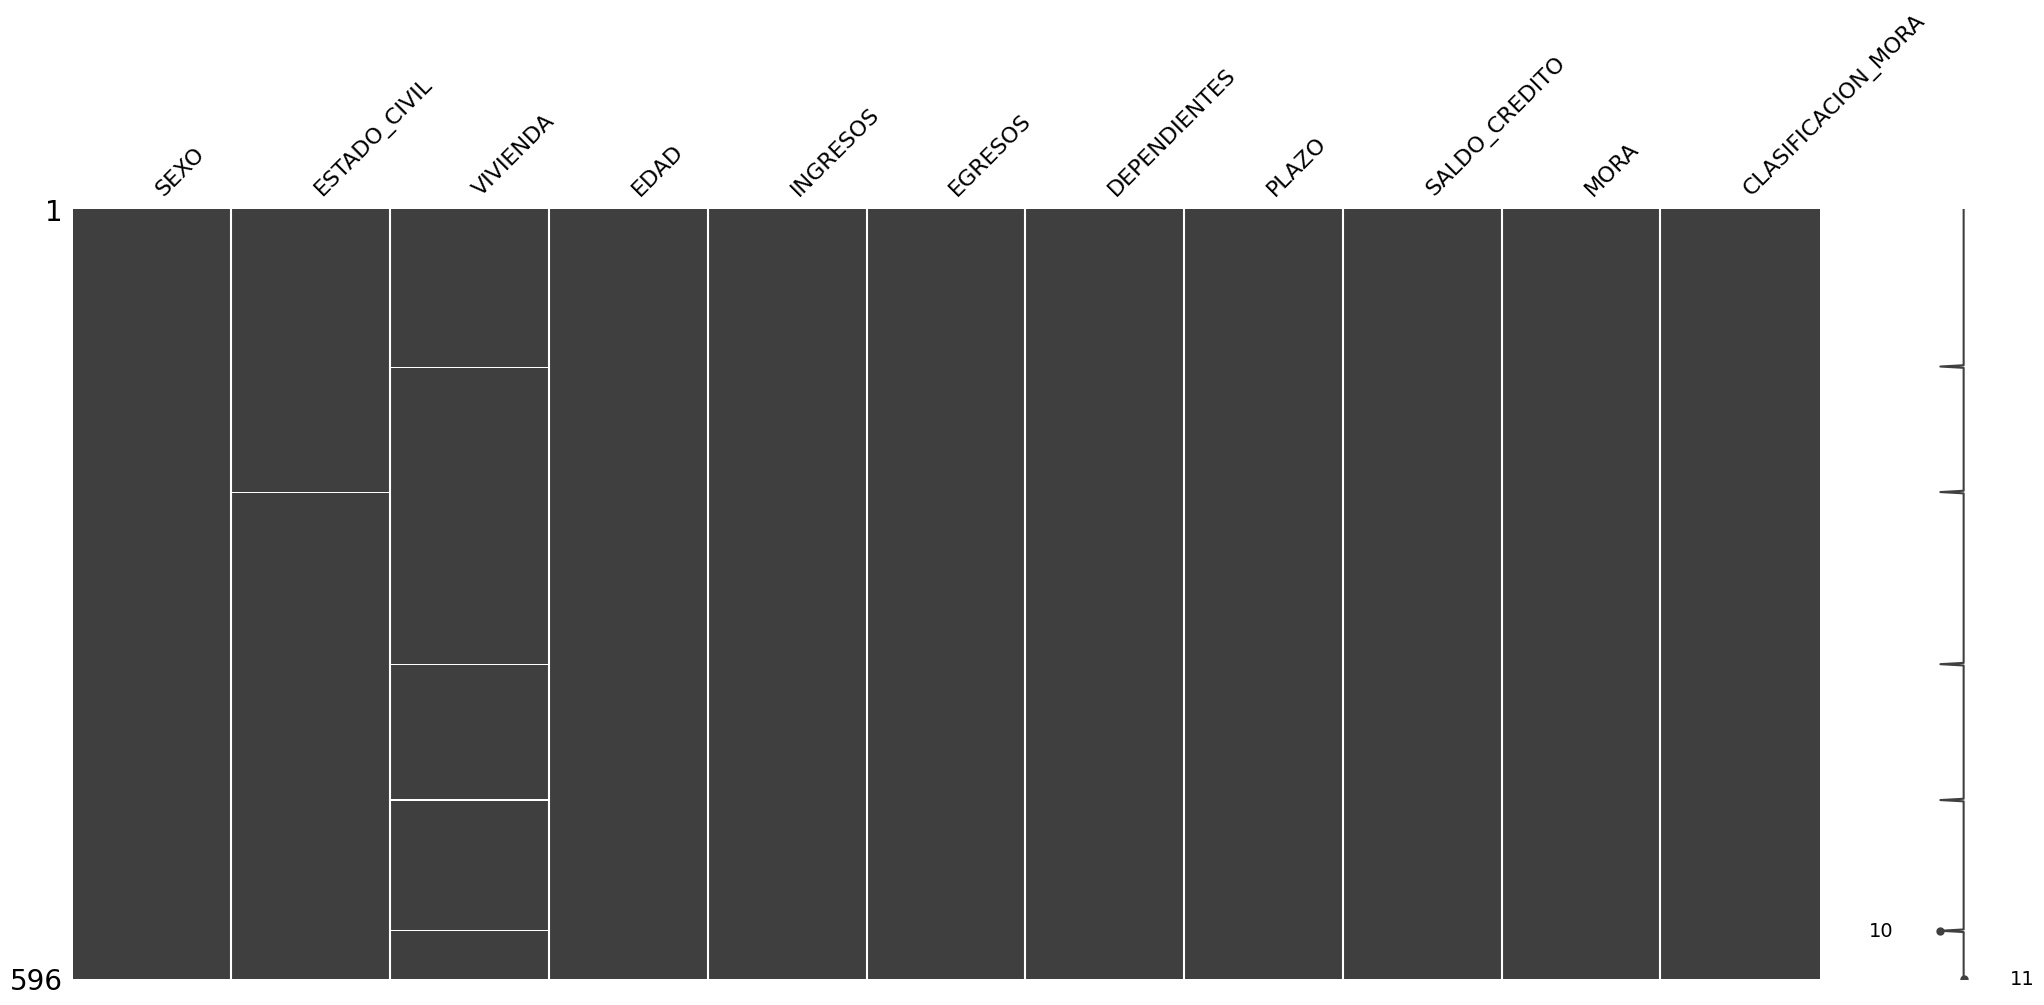

In [30]:
# Visualizar Datos Faltantes

# visualizar la distribución de datos faltantes. Puedes usar bibliotecas como missingno para crear gráficos
# Esto dará una visualización gráfica de la distribución de valores faltantes en el DataFrame.

import missingno as msno
msno.matrix(df)




---


***Tambien podemos mostrar la suma de valores perdidos y no perdidos por variable***


---



In [31]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

SEXO
False    596
Name: count, dtype: int64

ESTADO_CIVIL
False    595
True       1
Name: count, dtype: int64

VIVIENDA
False    592
True       4
Name: count, dtype: int64

EDAD
False    596
Name: count, dtype: int64

INGRESOS
False    596
Name: count, dtype: int64

EGRESOS
False    596
Name: count, dtype: int64

DEPENDIENTES
False    596
Name: count, dtype: int64

PLAZO
False    596
Name: count, dtype: int64

SALDO_CREDITO
False    596
Name: count, dtype: int64

MORA
False    596
Name: count, dtype: int64

CLASIFICACION_MORA
False    596
Name: count, dtype: int64



**NOTA:**   Debemos tomar decisiones en cuanto a como manejar los valores perdidos encontrados en nuestro dataframe, esto quiere decir, considerar diferentes opciones de limpieza de nuestra información sin afectar los resultados de la investigación.




---


***REEMPLAZAR VALORES EN 0 POR LA MEDIA"***


---



In [87]:
# Calculamos el valor de la media excluyendo los valores en 0

INGRESOS_mean = df['INGRESOS'][df['INGRESOS'] != 0].mean()
EGRESOS_mean = df['EGRESOS'][df['EGRESOS'] != 0].mean()

# Reemplazamos los valores en 0 en la variable 'INGRESOS' por la media calculada

df['INGRESOS'] = df['INGRESOS'].replace(0, INGRESOS_mean)

# Reemplazamos los valores en 0 en la variable 'EGRESOS' por la media calculada
df['EGRESOS'] = df['EGRESOS'].replace(0, EGRESOS_mean)

# Verificamos los cambios realizados
print(df['INGRESOS'].describe())
print(df['EGRESOS'].describe())


count    5.960000e+02
mean     1.657305e+07
std      1.476538e+08
min      1.000000e+00
25%      1.714274e+06
50%      2.232956e+06
75%      4.000036e+06
max      2.764298e+09
Name: INGRESOS, dtype: float64
count    5.960000e+02
mean     9.688126e+06
std      7.205159e+07
min      1.000000e+00
25%      6.050978e+05
50%      1.026809e+06
75%      1.657893e+06
max      1.183283e+09
Name: EGRESOS, dtype: float64




---


***Consultar la cantidad de valores faltantes en el DataFrame por campo***


---



In [41]:
#  identificar y contar la cantidad de valores faltantes (NaN o None) en el DataFrame df

df.isna().sum()


,0
SEXO,0
ESTADO_CIVIL,0
VIVIENDA,0
EDAD,0
INGRESOS,0
...,...
PLAZO,0
SALDO_CREDITO,0
MORA,0
CLASIFICACION_MORA,0




---


***Consultar la cantidad total de valores faltantes en el DataFrame ***


---



In [34]:
# suma de valores faltantes de todas las columnas

df.isna().sum().sum()

5



---


***ELIMINAR FILAS CON NaN***


---



Por defecto, dropna() elimina cualquier fila que contenga al menos un valor NaN. Tenemos que analizar si la fila que deseamos eliminar no afecta el resultado esperado de la investigación, es decir, la fila no aporta información importante

In [38]:
# elimina todas las filas del DataFrame df que tienen al menos un valor faltante (NaN)

df.dropna(subset=["VIVIENDA"], axis=0, inplace=True)
df.dropna(subset=["ESTADO_CIVIL"], axis=0, inplace=True)


*Consultamos nuevamente la cantidad de valores faltantes despues de aplicar la eliminación*

In [39]:
# verificar la cantidad de valores faltantes (NaN o None) en cada columna del DataFrame

df.isna().sum()

,0
SEXO,0
ESTADO_CIVIL,0
VIVIENDA,0
EDAD,0
INGRESOS,0
...,...
PLAZO,0
SALDO_CREDITO,0
MORA,0
CLASIFICACION_MORA,0


*Restablecer el indice del dataframe despues de la eliminación de las filas*

In [40]:
df.reset_index(drop=True, inplace=True)



---


***SI QUEREMOS REALIZAR UNA OPERACION A UN CAMPO DEL DATAFRAME Y RENOMBRAR LA COLUMNA***


---



In [ ]:
# Agregar calculo a un campo del dataframa

df['INGRESOS AJUSTE'] = df["INGRESOS AJUSTE"]*2
df['EGRESOS AJUSTE'] = df["EGRESOS AJUSTE"]*2

# Renombrar la columna

df.rename(columns={'INGRESOS AJUSTE':'INGRESOS'}, inplace=True)
df.rename(columns={'EGRESOS AJUSTE':'EGRESOS'}, inplace=True)

# Consultamos los ajustes
df.head()

,PLAZO,MORA,VALOR_DESEMBOLSO,EDAD,ESTADO_CIVIL,SEXO,INGRESOS,EGRESOS,PERSONAS_A_CARGO,CATEGORIA INGRESOS
0,120,0.0,35500000,54,CASADO,MASCULINO,6.478900e+09,2000002000,0,Alta
1,140,0.0,34500000,82,UNION LIBRE,MASCULINO,4.878000e+09,1600000000,0,Media
2,72,0.0,79052650,63,CASADO,MASCULINO,7.640000e+09,3275154000,0,Alta
3,28,0.0,1811351,71,CASADO,MASCULINO,4.326000e+09,529332000,0,Media
4,140,0.0,20000000,63,SOLTERO,MASCULINO,6.600000e+09,1509960000,0,Alta


---

**CREACIÓN CAMPOS "CATEGORIA"**


---

In [141]:
# Crea una nueva columna ' CATEGORIA TOTAL INGRESOS' y se asignamos una categoria de acuerdo con un rango
# pd.cut: Es una función de pandas utilizada para segmentar y clasificar valores en categorías basadas en intervalos especificados
# bins=[-np.inf (menos infinito), 1.000.000, 3.000.000, np.inf(mas infinito)]: Estos son los límites de los intervalos en los que se dividen los datos de la columna
# -np.inf (menos infinito) hasta 1.000.000 define el primer intervalo
# mayores de 1.000.000 hasta 5.000.000 define el segundo intervalo.
# mayores de 5.000.000 hasta np.inf (más infinito) define el tercer intervalo.
# labels=['Baja', 'Media', 'Alta']

df['CATEGORIA_INGRESOS'] = pd.cut(df['INGRESOS'], bins=[-np.inf, 1000000, 5000000, np.inf], labels=['Baja', 'Media', 'Alta'])

# Muestra el DataFrame con la nueva columna
pd.set_option('display.max_rows', 10)
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

In [142]:
df['CATEGORIA_PLAZO'] = pd.cut(df['PLAZO'], bins=[-np.inf, 24, 60, np.inf], labels=['plazo bajo', 'plazo medio', 'plazo alto'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_EDAD'] = pd.cut(df['EDAD'], bins=[-np.inf, 30, 60, np.inf], labels=['primera edad', 'segunda edad', 'tercera edad'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_EGRESOS'] = pd.cut(df['EGRESOS'], bins=[-np.inf, 1000000, 3000000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_SALDO'] = pd.cut(df['SALDO_CREDITO'], bins=[-np.inf, 10000000, 50000000, np.inf], labels=['saldo_bajo', 'saldo_medio', 'saldo_alto'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_MORA'] = pd.cut(df['MORA'], bins=[-np.inf, 100, 300, np.inf], labels=['mora_baja', 'mora_media', 'mora_alta'])

# Muestra el DataFrame con la nueva columna
print(df)


       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

# ***GRAFICOS PARA ANALISIS ESTADISTICO BIVARIADO***



---


***Gráfico de Dispersión (Scatter Plot)***


---
Un gráfico de dispersión muestra la relación entre dos variables numéricas. Es útil para visualizar la correlación y detectar patrones

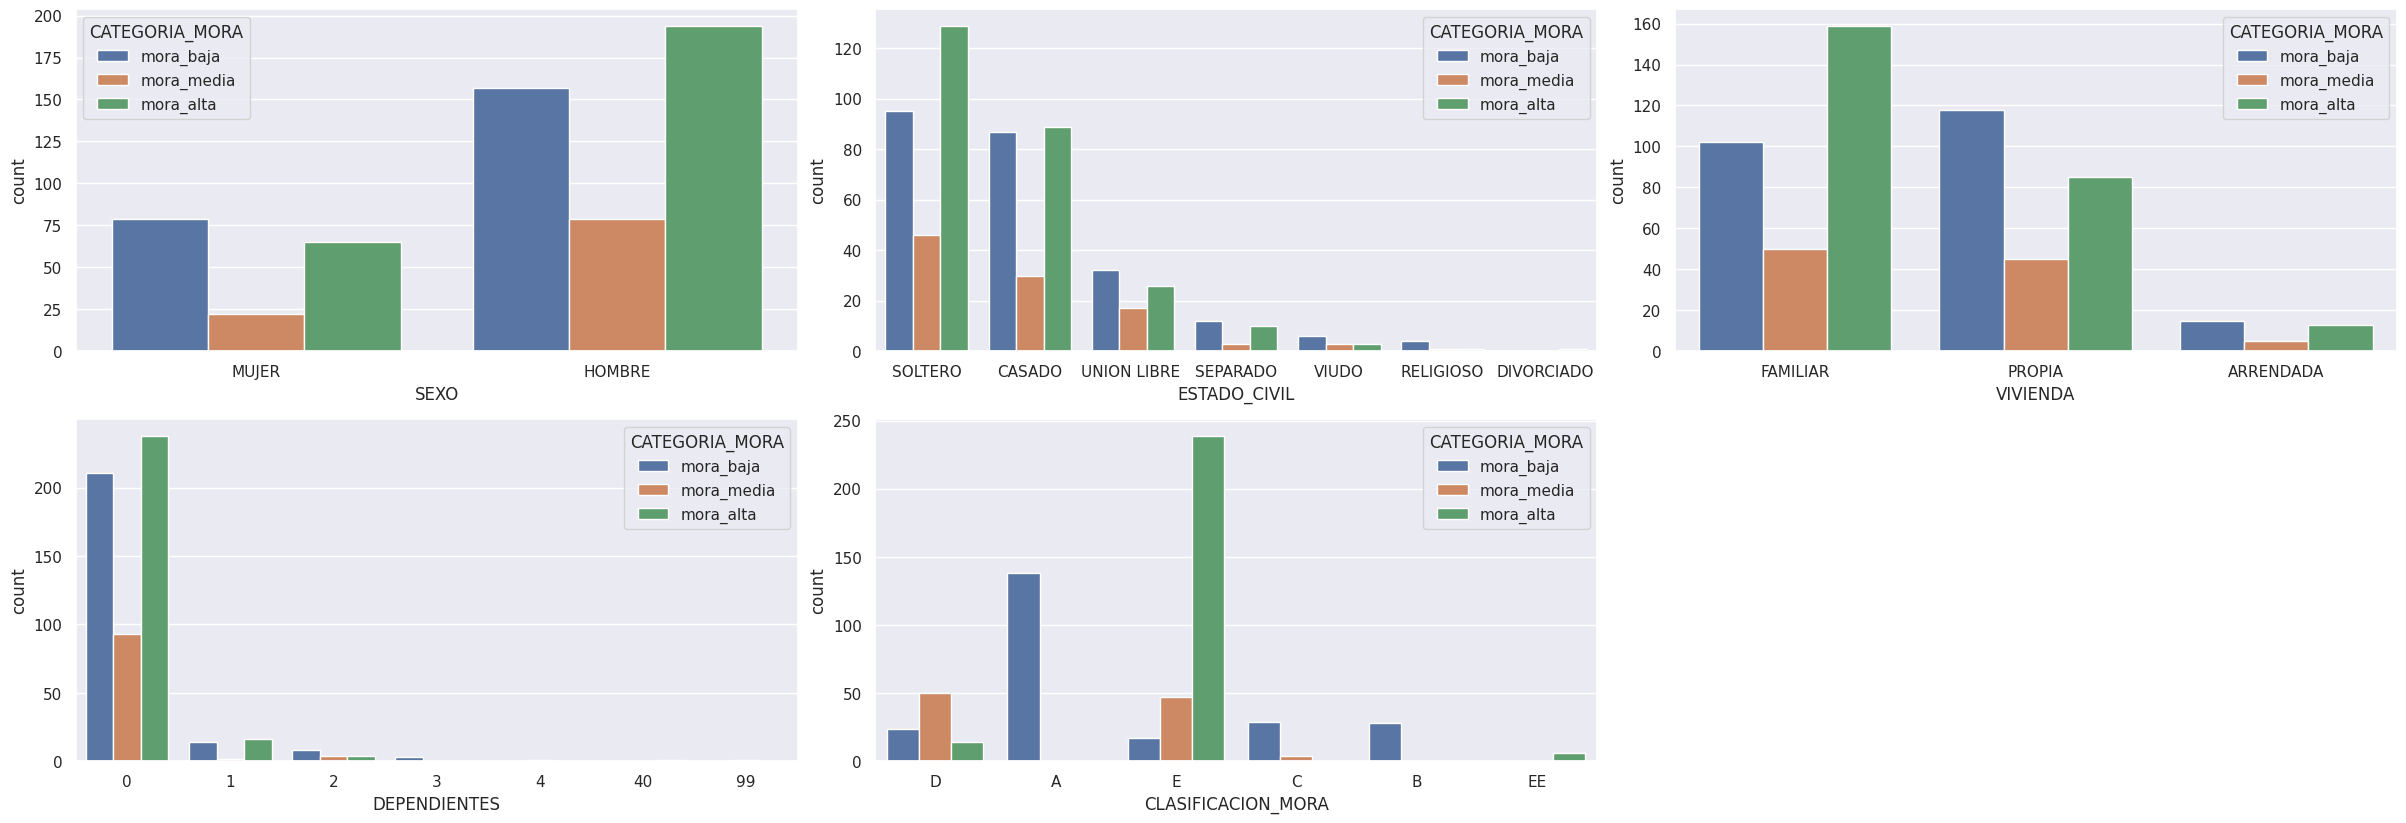

In [80]:
sns.set(rc={'figure.figsize':(24.10,8.27)})
plt.subplot(231)
sns.countplot(x="SEXO", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)
plt.subplot(232)
sns.countplot(x="ESTADO_CIVIL", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)
plt.subplot(233)
sns.countplot(x="VIVIENDA", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)
plt.subplot(234)
sns.countplot(x="DEPENDIENTES", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)
plt.subplot(235)
sns.countplot(x="CLASIFICACION_MORA", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)

<Axes: xlabel='CATEGORIA_SALDO', ylabel='count'>

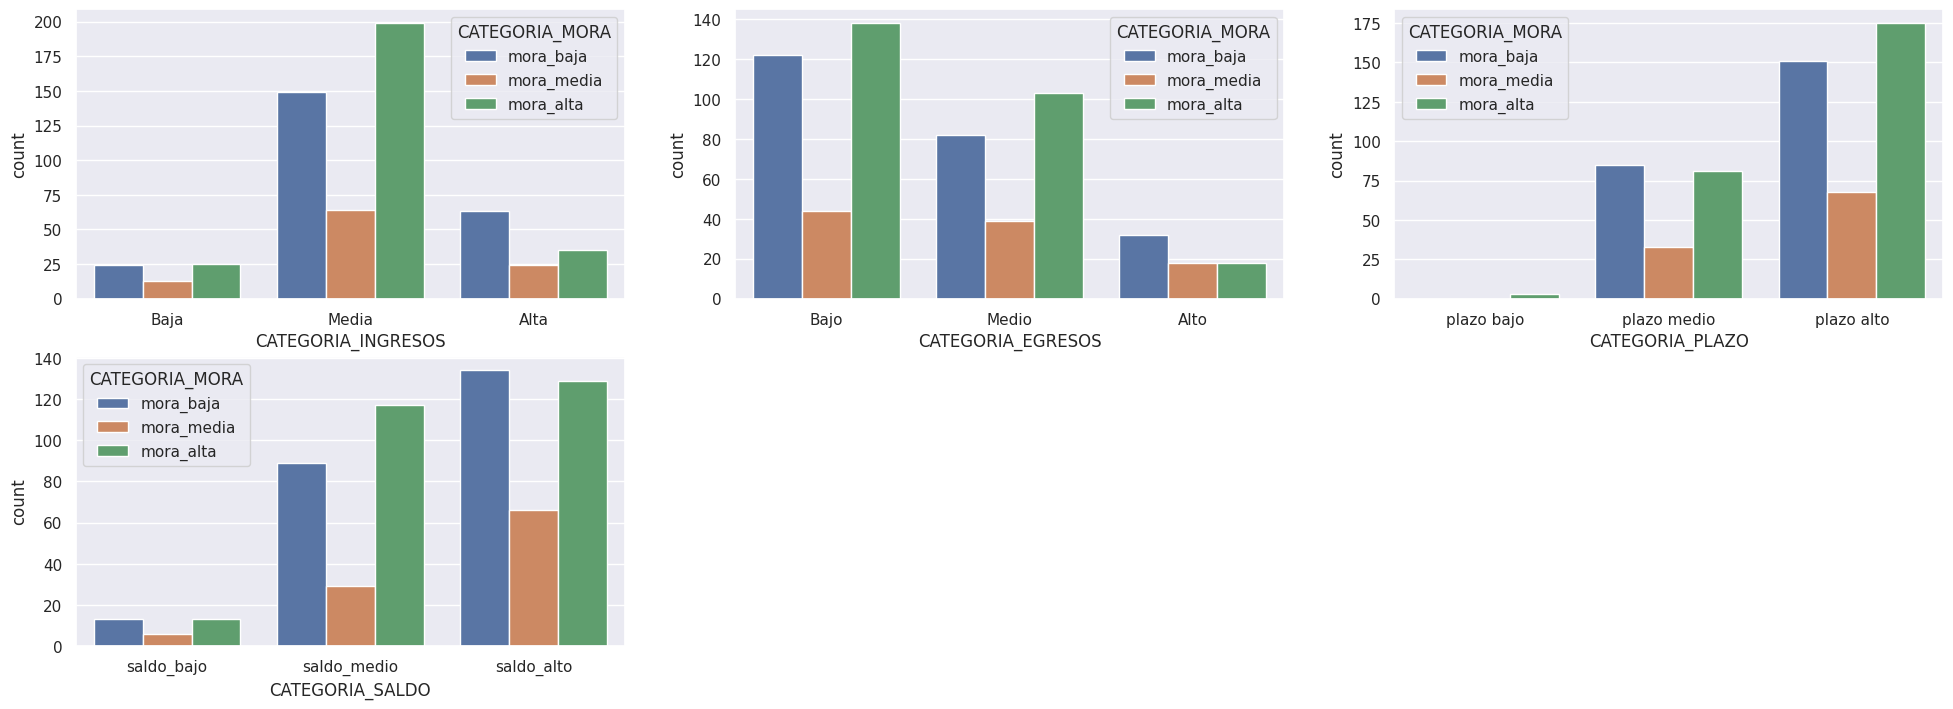

In [92]:
plt.subplot(231)
sns.countplot(x="CATEGORIA_INGRESOS", hue='CATEGORIA_MORA', data=df)
plt.subplot(232)
sns.countplot(x="CATEGORIA_EGRESOS", hue='CATEGORIA_MORA', data=df)
plt.subplot(233)
sns.countplot(x="CATEGORIA_PLAZO", hue='CATEGORIA_MORA', data=df)
plt.subplot(234)
sns.countplot(x="CATEGORIA_SALDO", hue='CATEGORIA_MORA', data=df)



---


***Gráfico de Regresión (Regression Plot)***


---



El gráfico de regresión es similar al gráfico de dispersión, pero incluye una línea de regresión ajustada, que ayuda a visualizar la relación entre las variables.

Un gráfico de regresión es una herramienta visual para analizar la relación entre dos variables y entender cómo una variable predictora (independiente) afecta a una variable dependiente









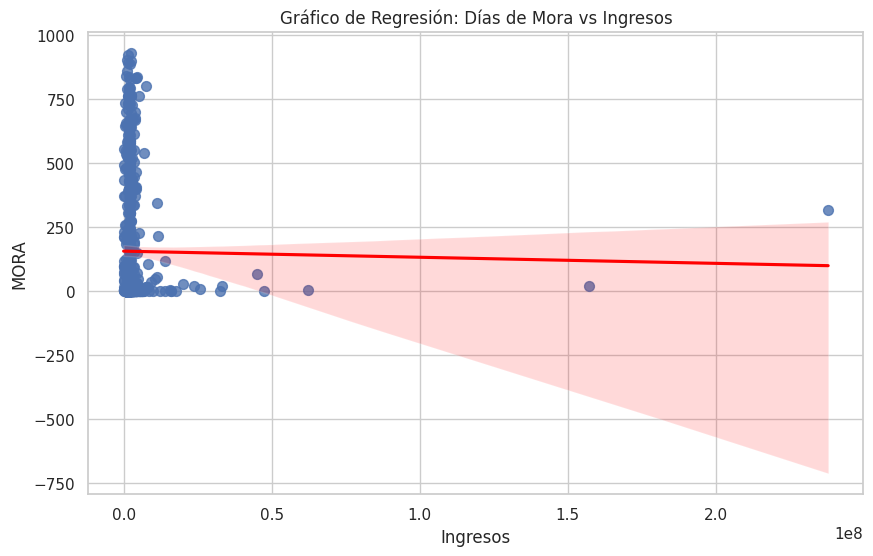

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='INGRESOS', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('MORA')
plt.show()

**Pendiente de la Línea**: La pendiente de la línea de regresión indica la dirección y la fuerza de la relación entre las variables:

**Pendiente Positiva**: Si la línea tiene una pendiente ascendente, indica una relación positiva: a medida que aumenta la variable independiente, también lo hace la variable dependiente.

**Pendiente Negativa**: Si la línea tiene una pendiente descendente, indica una relación negativa: a medida que aumenta la variable independiente, disminuye la variable dependiente.

**Pendiente Cero**: Si la línea es horizontal, indica que no hay relación lineal entre las variables.


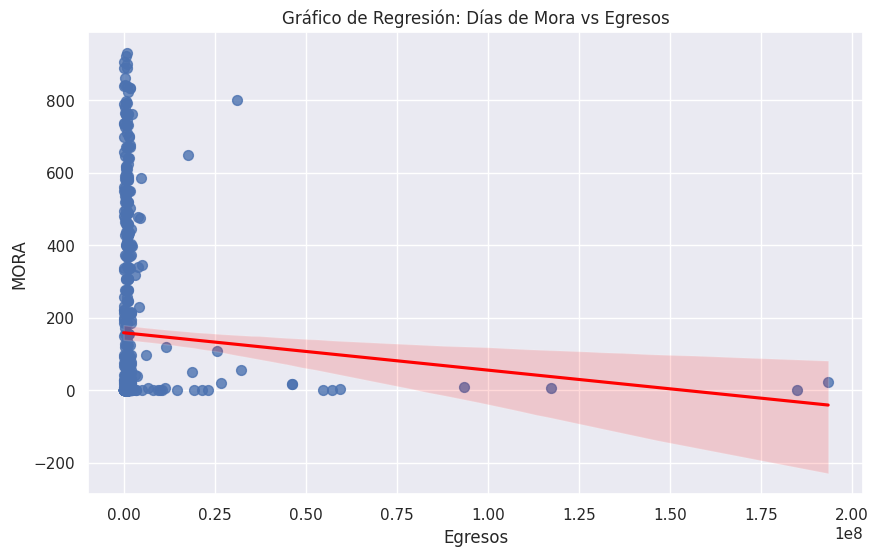

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='EGRESOS', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Egresos')
plt.xlabel('Egresos')
plt.ylabel('MORA')
plt.show()

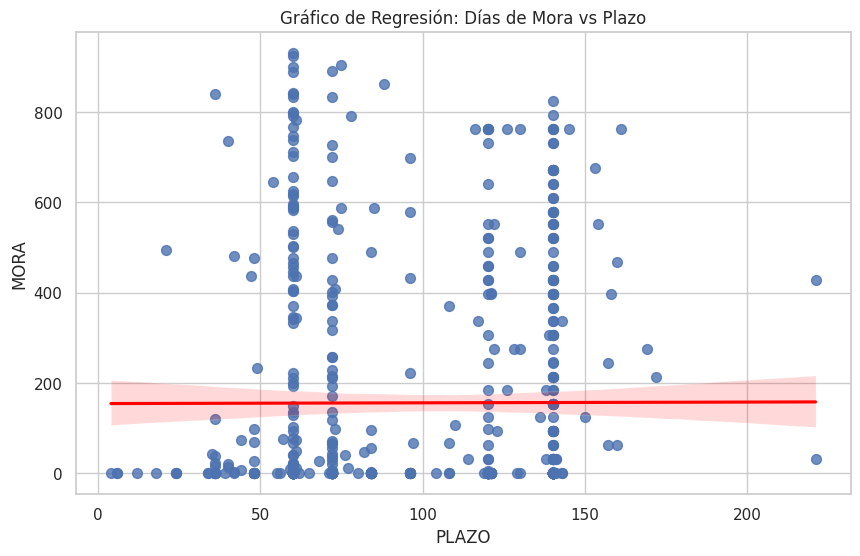

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='PLAZO', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Plazo')
plt.xlabel('PLAZO')
plt.ylabel('MORA')
plt.show()

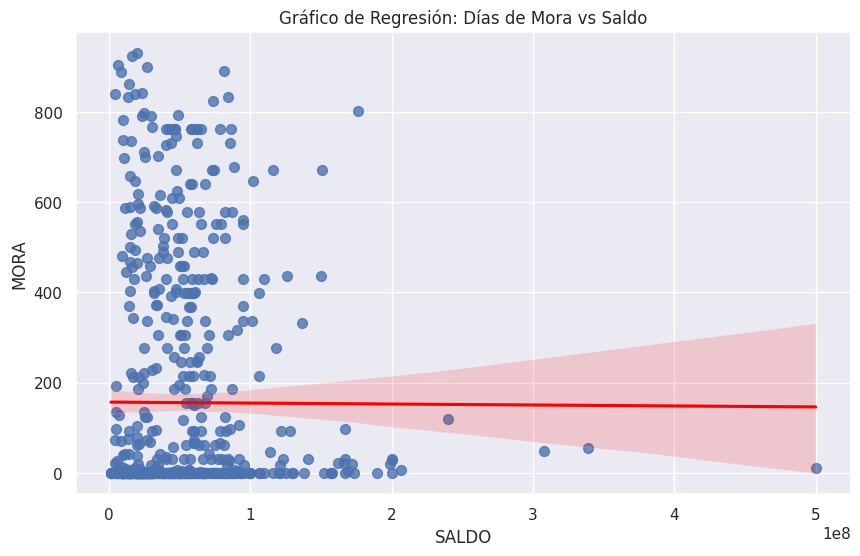

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='SALDO', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Saldo')
plt.xlabel('SALDO')
plt.ylabel('MORA')
plt.show()

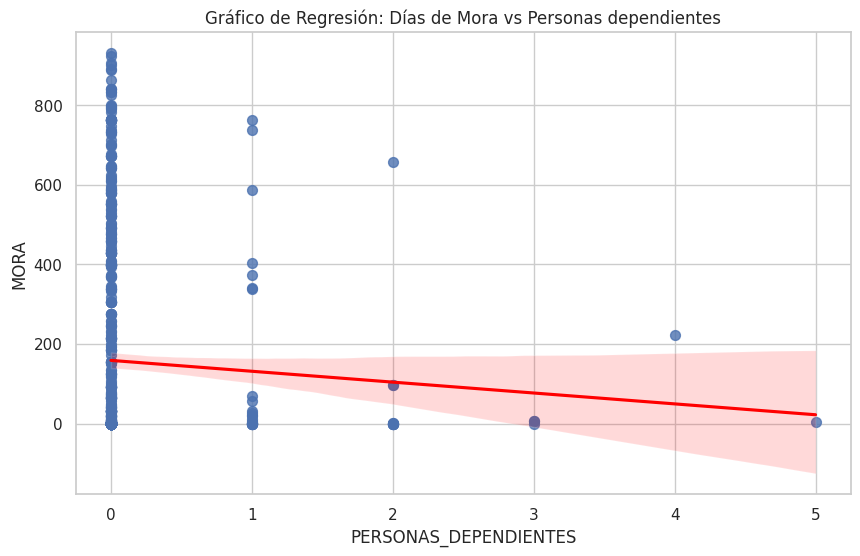

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='PERSONAS_DEPENDIENTES', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Personas dependientes')
plt.xlabel('PERSONAS_DEPENDIENTES')
plt.ylabel('MORA')
plt.show()

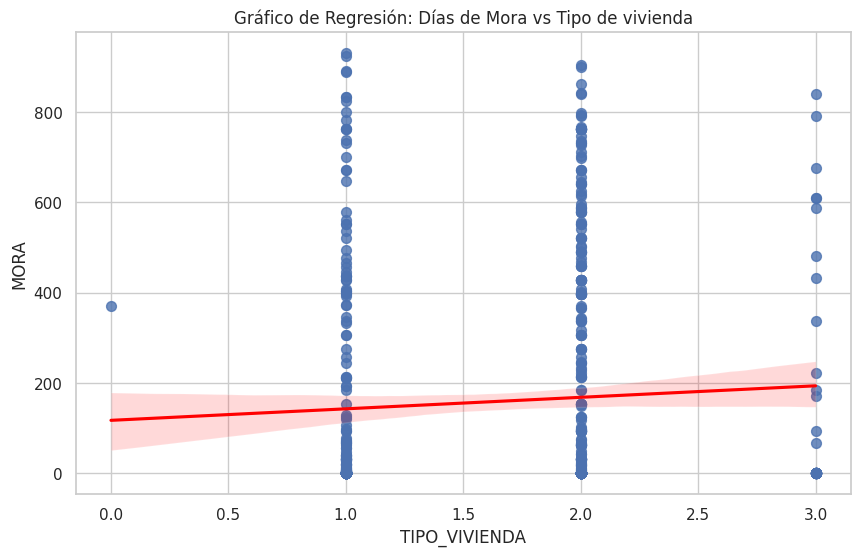

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='TIPO_VIVIENDA', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Tipo de vivienda')
plt.xlabel('TIPO_VIVIENDA')
plt.ylabel('MORA')
plt.show()

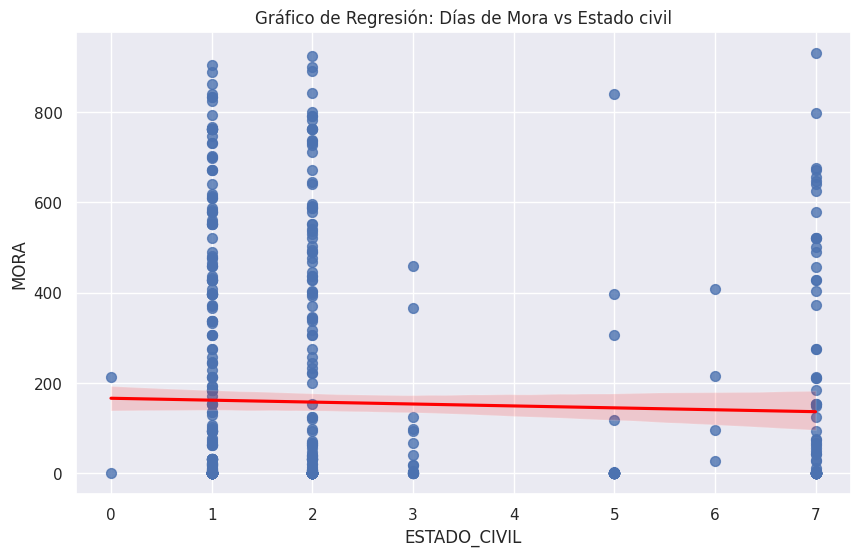

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ESTADO_CIVIL', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Estado civil')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('MORA')
plt.show()

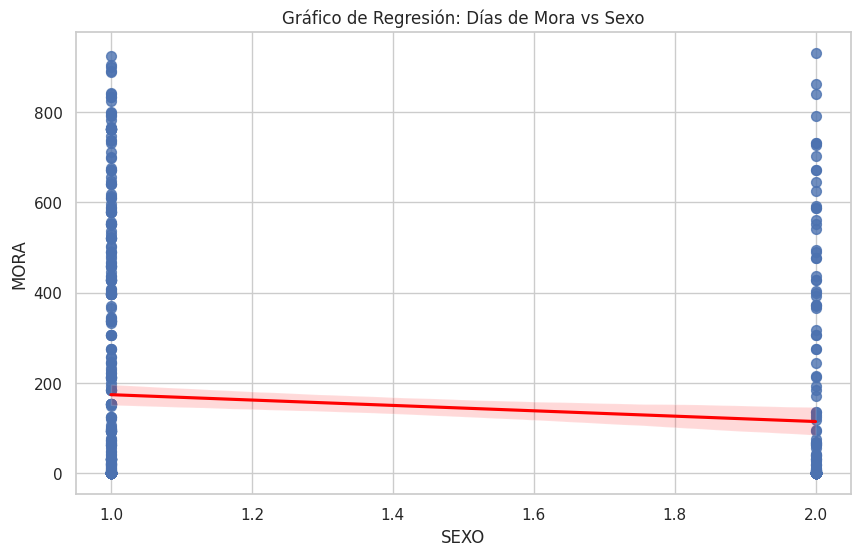

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='SEXO', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Sexo')
plt.xlabel('SEXO')
plt.ylabel('MORA')
plt.show()



---



***Mapa de Calor de la Matriz de Correlación (Heatmap)***


---



Un mapa de calor muestra la matriz de correlación entre todas las variables. Es útil si quieres ver cómo días de mora se correlaciona con otras variables, además de ingresos.

Coeficiente de Correlación: El mapa de calor muestra el coeficiente de correlación entre pares de variables, que varía de -1 a 1

1: **Correlación positiva perfecta** (cuando una variable aumenta, la otra también lo hace de manera proporcional).

0: **Sin correlación** (no hay relación lineal entre las variables).

-1: **Correlación negativa perfecta** (cuando una variable aumenta, la otra disminuye de manera proporcional).

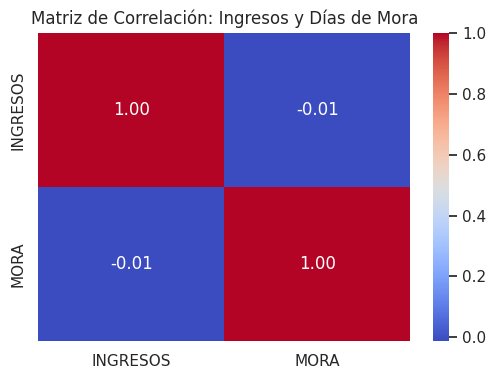

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['INGRESOS', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Ingresos y Días de Mora')
plt.show()



**Correlación entre INGRESOS y DIAS_DE_MORA:**

Valor de -0.02: Esto indica una correlación extremadamente débil entre INGRESOS y DIAS_DE_MORA. El valor cercano a 0 sugiere que no hay una relación lineal significativa entre estos dos variables.

**Negativa:** Aunque la correlación es negativa, el valor cercano a 0 significa que esta relación negativa es tan débil que es prácticamente insignificante. En otras palabras, no hay evidencia clara de que los ingresos influyan en los días de mora o viceversa.

Un coeficiente de correlación de -0.02 indica que cualquier tendencia observada es muy débil y probablemente no es significativa desde un punto de vista práctico. Los ingresos y los días de mora parecen no estar relacionados de manera sustancial en el conjunto de datos.


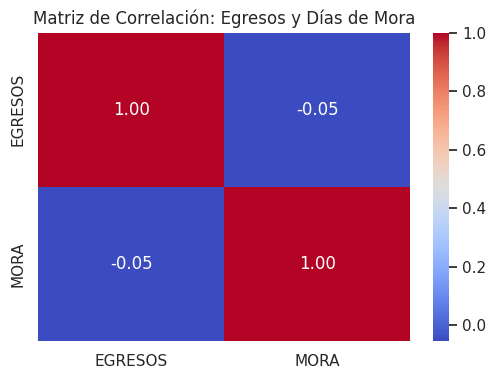

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['EGRESOS', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Egresos y Días de Mora')
plt.show()

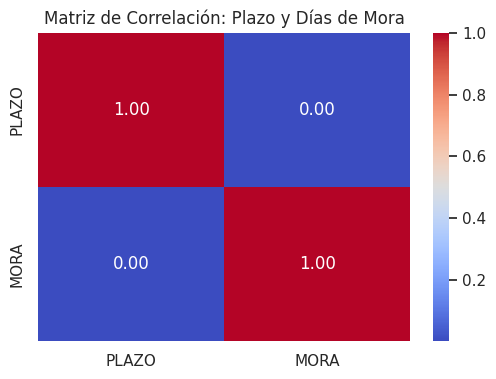

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['PLAZO', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Plazo y Días de Mora')
plt.show()

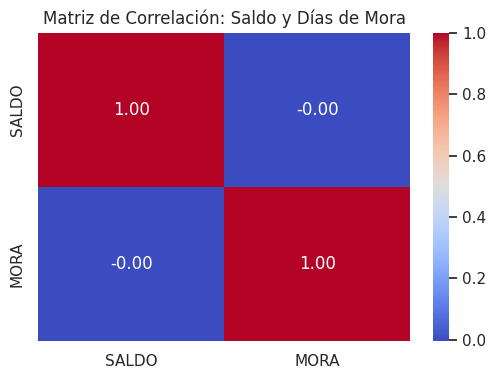

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['SALDO', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Saldo y Días de Mora')
plt.show()

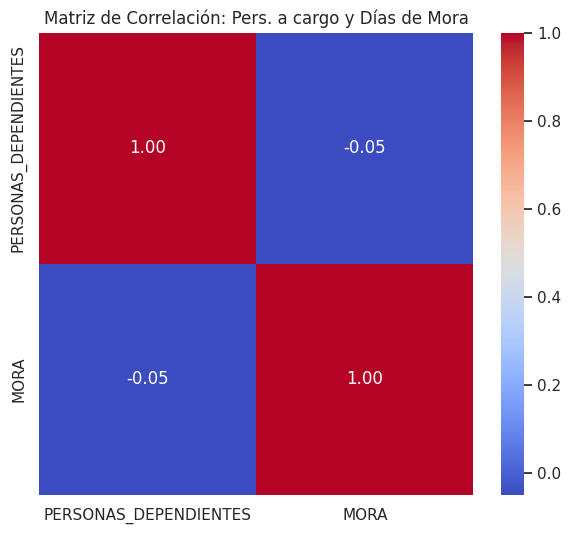

In [ ]:
plt.figure(figsize=(7, 6))
correlation_matrix = df[['PERSONAS_DEPENDIENTES', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Pers. a cargo y Días de Mora')
plt.show()

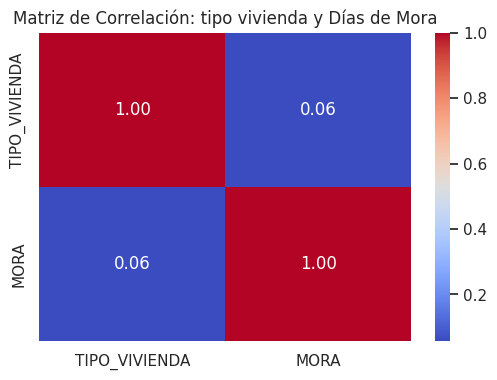

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['TIPO_VIVIENDA', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: tipo vivienda y Días de Mora')
plt.show()

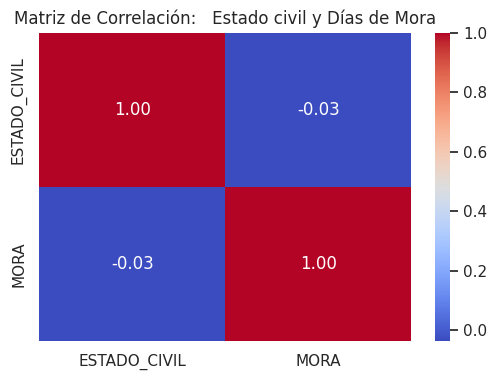

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['ESTADO_CIVIL', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación:   Estado civil y Días de Mora')
plt.show()

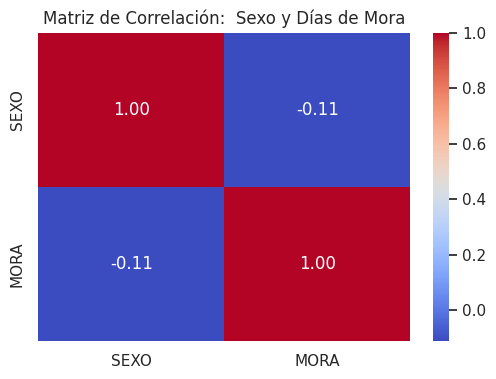

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['SEXO', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación:  Sexo y Días de Mora')
plt.show()



---


***BOX PLOT***


---



El box plot es menos común para mostrar la relación entre dos variables continuas, pero puede ser útil si quieres ver cómo se distribuyen los días de mora para diferentes rangos de ingresos (requiere categorización previa).

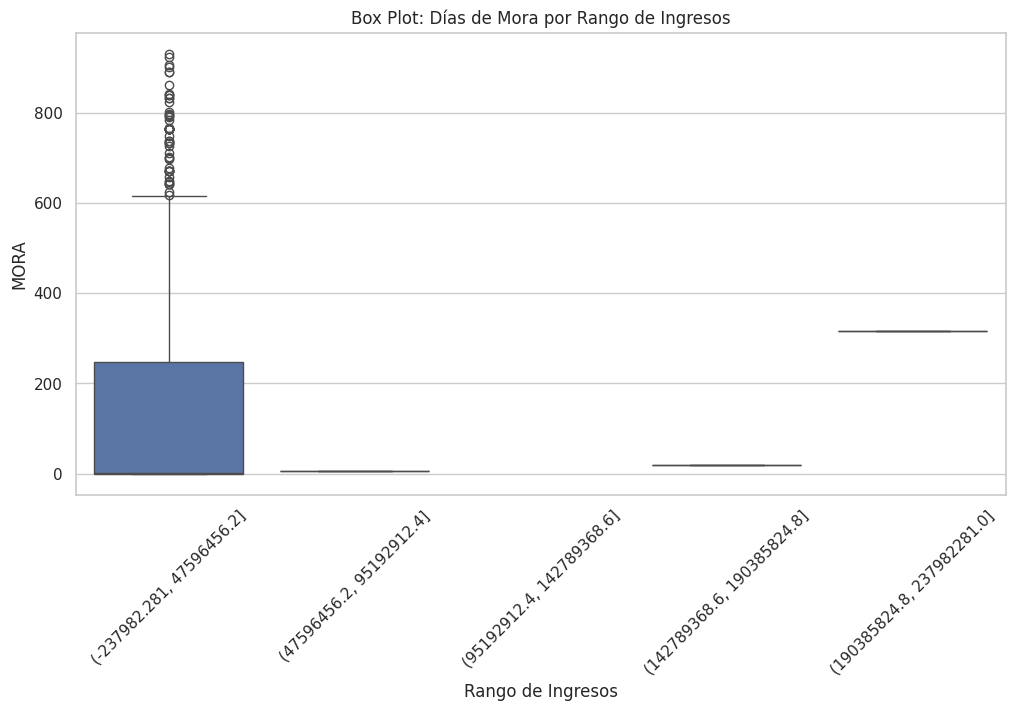

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_INGRESOS'] = pd.cut(df['INGRESOS'], bins=5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_INGRESOS', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por Rango de Ingresos')
plt.xlabel('Rango de Ingresos')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()


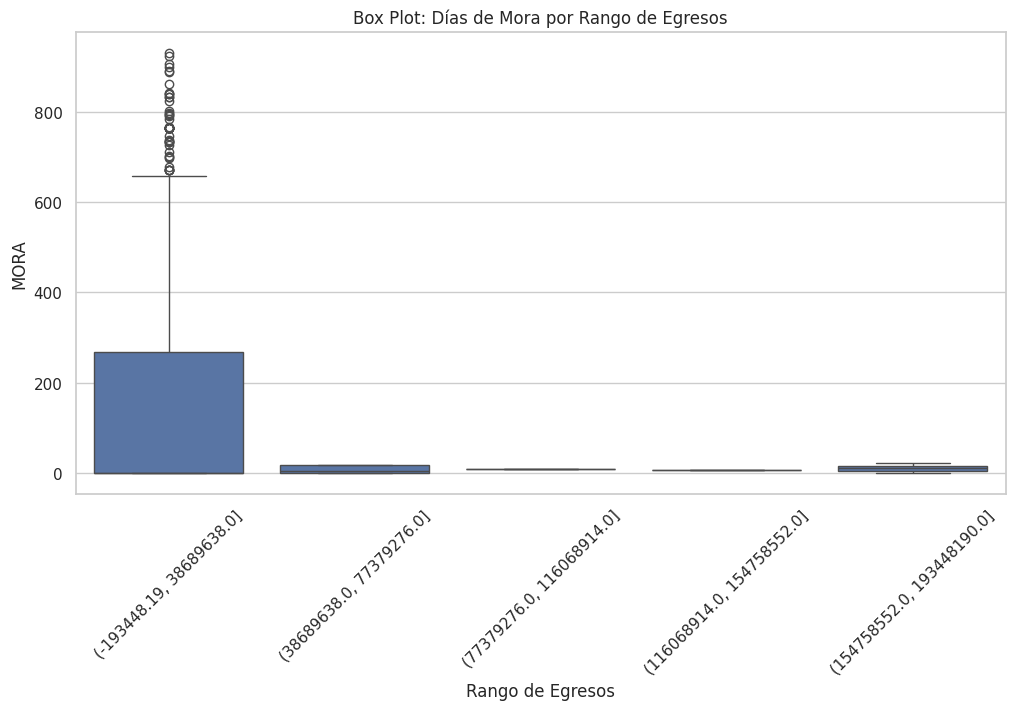

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_EGRESOS'] = pd.cut(df['EGRESOS'], bins=5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_EGRESOS', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por Rango de Egresos')
plt.xlabel('Rango de Egresos')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

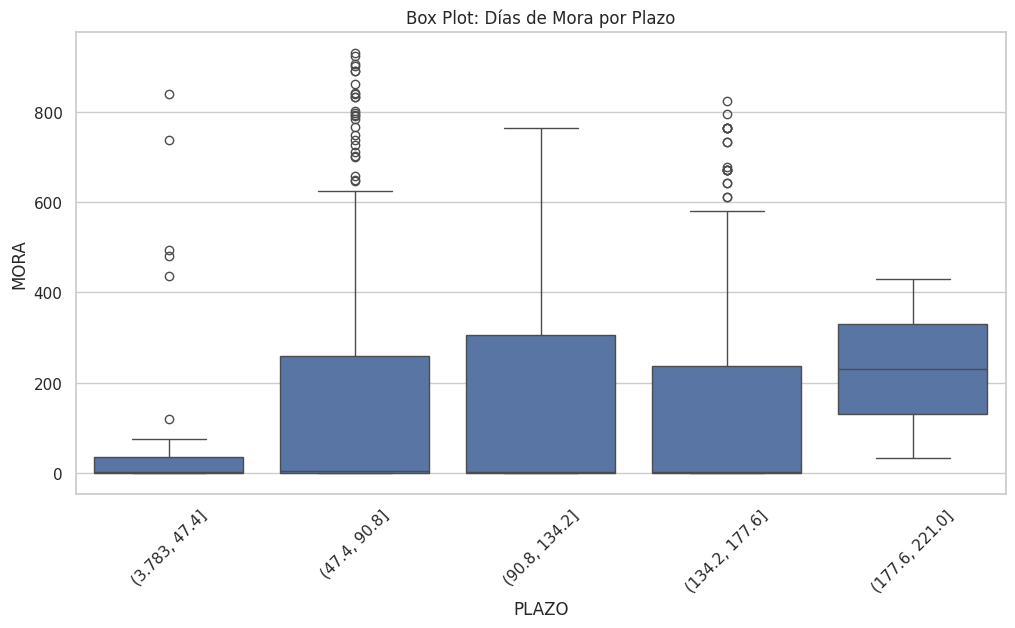

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_PLAZO'] = pd.cut(df['PLAZO'], bins=5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_PLAZO', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por Plazo')
plt.xlabel('PLAZO')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

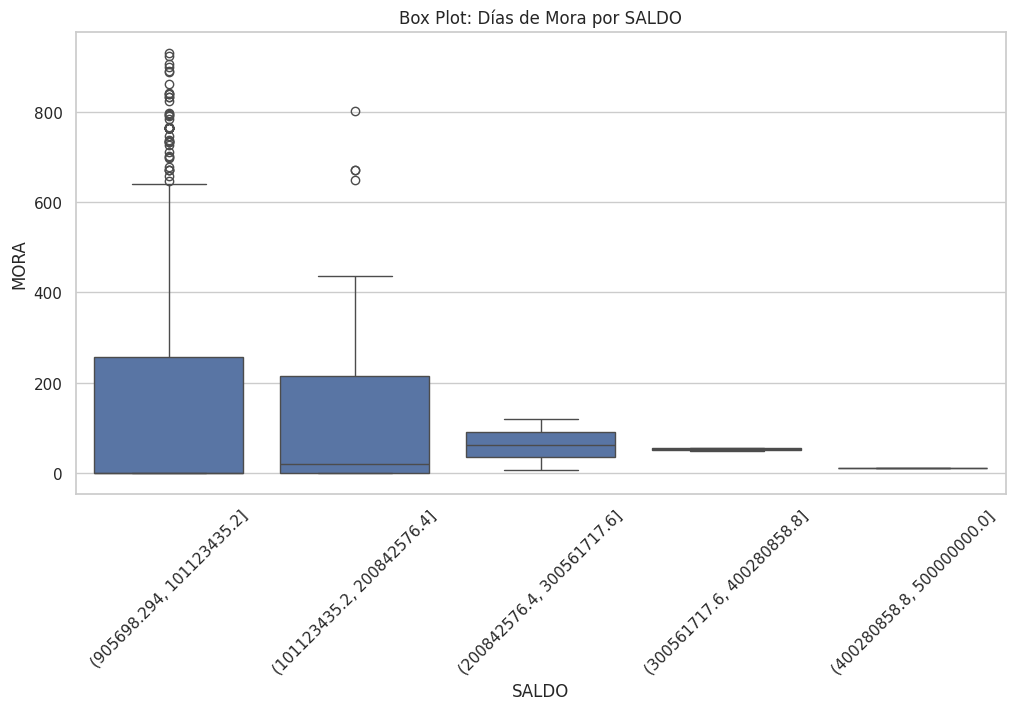

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_SALDO'] = pd.cut(df['SALDO'], bins=5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_SALDO', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por SALDO')
plt.xlabel('SALDO')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

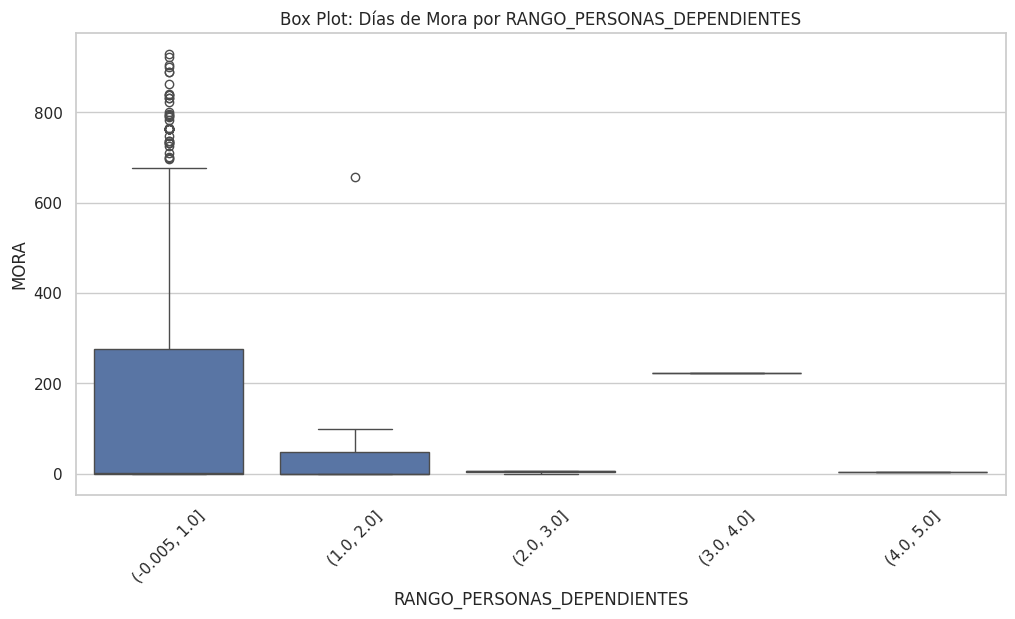

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_PERSONAS_DEPENDIENTES'] = pd.cut(df['PERSONAS_DEPENDIENTES'], bins=5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_PERSONAS_DEPENDIENTES', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por RANGO_PERSONAS_DEPENDIENTES')
plt.xlabel('RANGO_PERSONAS_DEPENDIENTES')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

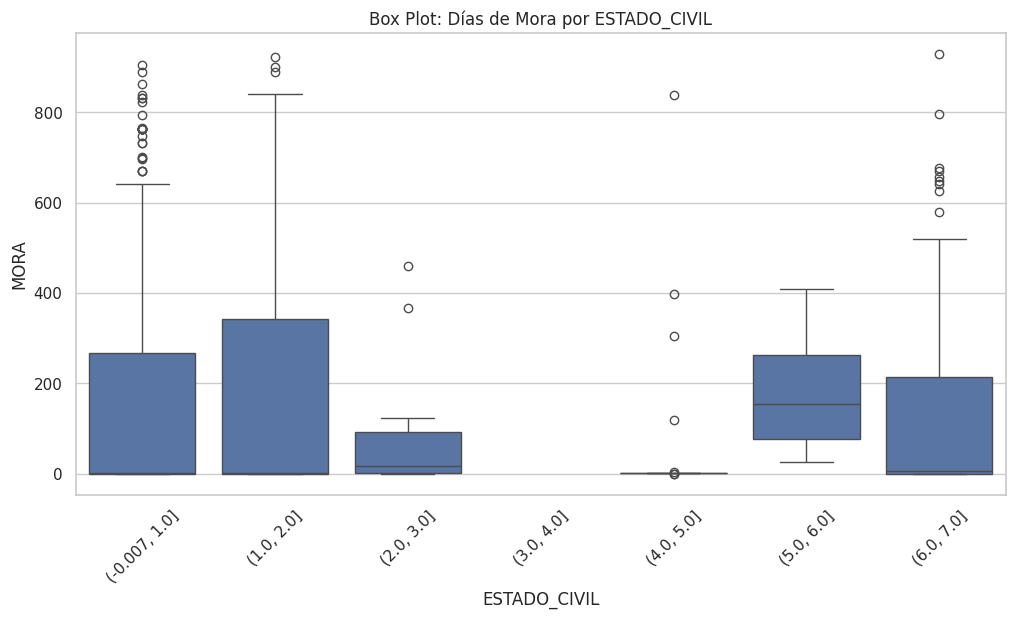

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_ESTADO_CIVIL'] = pd.cut(df['ESTADO_CIVIL'], bins=7)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_ESTADO_CIVIL', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por ESTADO_CIVIL')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

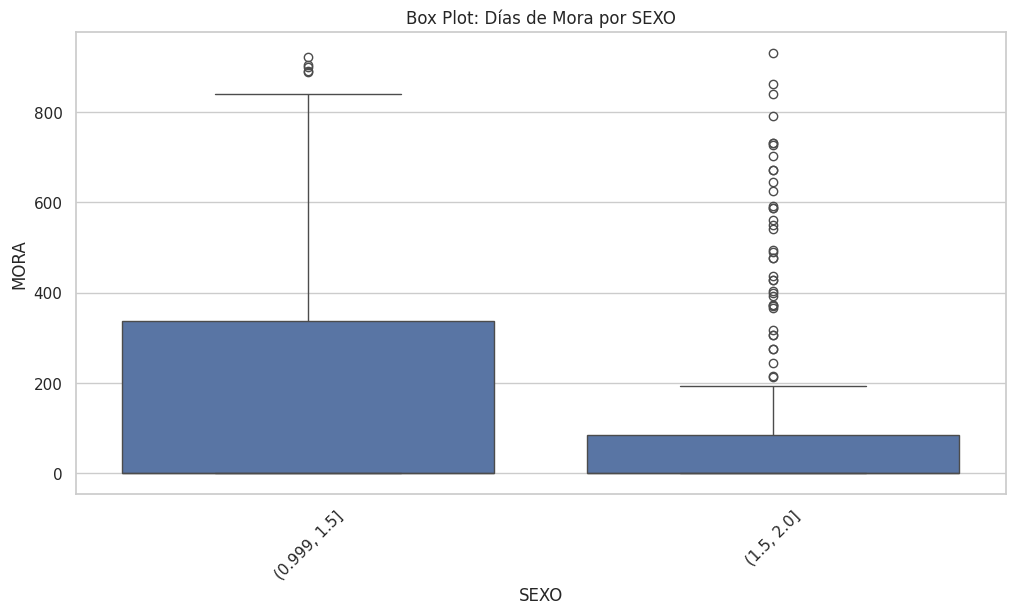

In [ ]:
# Primero, categoriza los ingresos
df['RANGO_SEXO'] = pd.cut(df['SEXO'], bins=2)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RANGO_SEXO', y='MORA', data=df)
plt.title('Box Plot: Días de Mora por SEXO')
plt.xlabel('SEXO')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

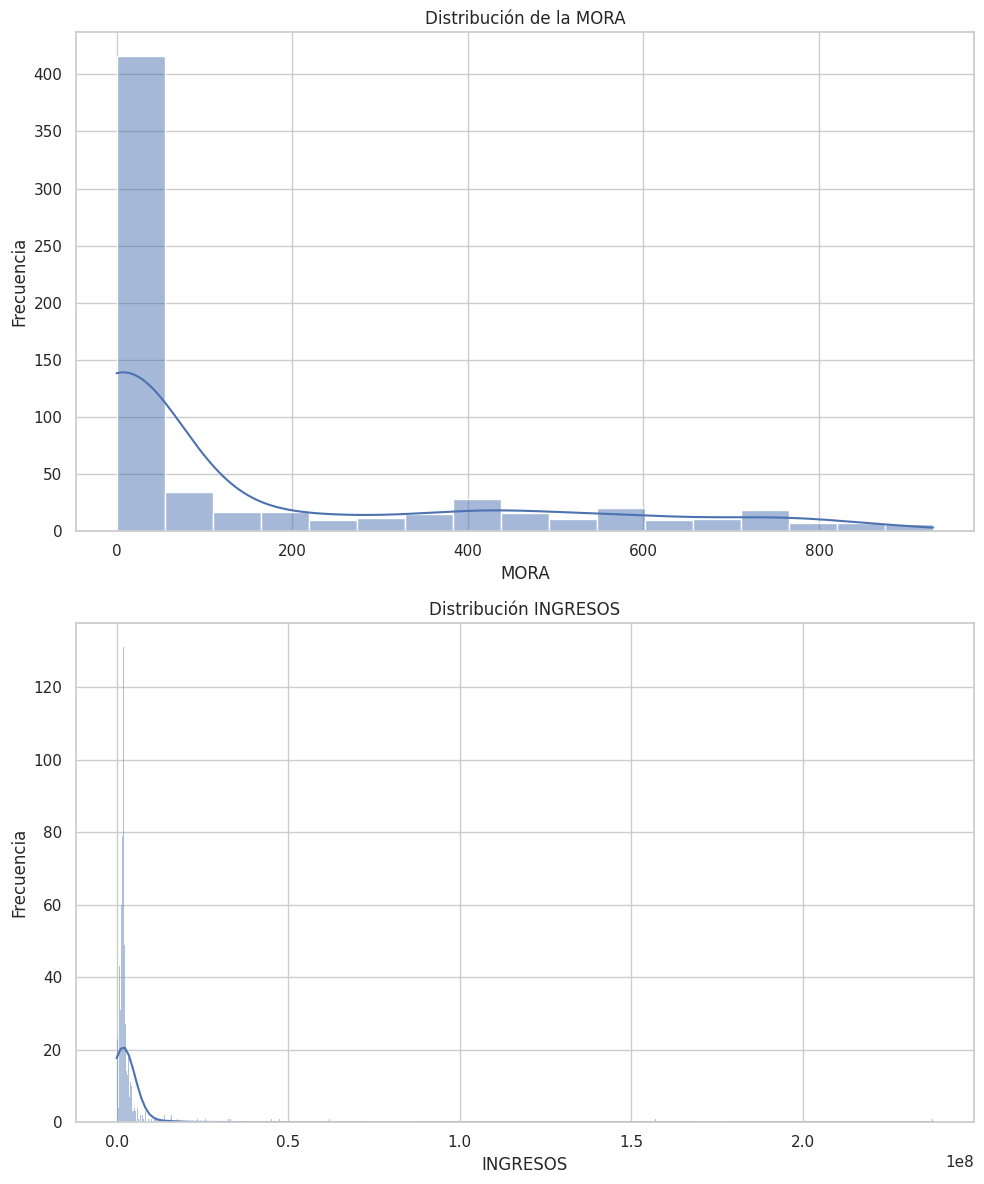

In [ ]:
# Configuración del estilo de seaborn
sns.set_style("whitegrid")

# Creando la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico para 'close'
sns.histplot(df['MORA'], kde=True, ax=ax1)
ax1.set_title('Distribución de la MORA')
ax1.set_xlabel('MORA')
ax1.set_ylabel('Frecuencia')

# Gráfico para 'volume'
sns.histplot(df['INGRESOS'], kde=True, ax=ax2)
ax2.set_title('Distribución INGRESOS')
ax2.set_xlabel('INGRESOS')
ax2.set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Grafico de Close: La distribución del precio de cierre tiene una asimetría positiva o sesgo a la derecha. Esto significa que la cola derecha de la distribución es más larga. De igual manera la mayoria de los datos con frecuencias más altas se encuentran en el rango de precios entre los
20,000, pero hay una cola hacia la derecha que se extiende hacia precios más altos, aunque con menor frecuencia. Indicando que, aunque los precios altos han ocurrido, son menos frecuentes que los precios más bajos.

Gráfico de Volume: La distribución del volumen también muestra asimetría positiva o sesgo a la derecha, pero de manera más extrema que el precio de cierre. La mayoría de los volúmenes son bajos, con una larga cola que se extiende hacia volúmenes más altos. Mostrando que los volúmenes extremadamente altos son raros, mientras los volúmenes bajos son comunes. La curva está muy concentrada cerca de cero y se va desvaneciendo lentamente a medida que el volumen aumenta.

**GRAFICA DE CAJAS (BOX PLOT)**

Los gráficos de caja son útiles para visualizar la distribución y los valores atípicos en datos numéricos.

In [ ]:
# Calcular la mediana, varianza y desviación estándar

mediana = df[['MORA', 'INGRESOS']].median()
varianza = df[['MORA', 'INGRESOS']].var()

print("Mediana de MORA: {} ---- Mediana de INGRESOS: {}".format(mediana.iloc[0], mediana.iloc[1]))
print("Varianza de MORA: {} ---- Varianza de INGRESOS: {}".format(varianza.iloc[0], varianza.iloc[1]))

Mediana de MORA: 1.0 ---- Mediana de INGRESOS: 2044775.5
Varianza de MORA: 63344.79623489036 ---- Varianza de INGRESOS: 146440572962563.97


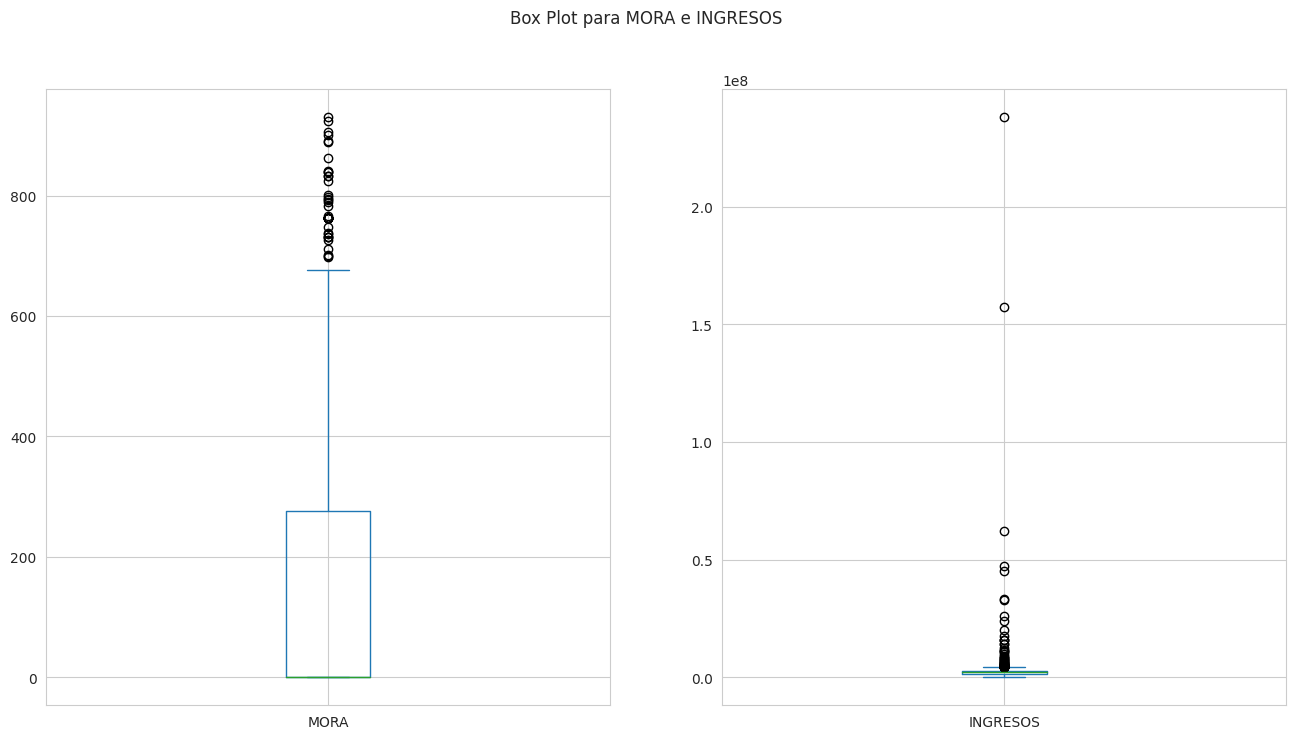

In [ ]:
# Grafica de cajas para analizar los campos "MORA" e "INGRESOS"

# Este comando genera un gráfico de caja para las columnas INGRESOS y MORA del DataFrame

df[['MORA', 'INGRESOS']].plot(kind='box',
subplots=True,
layout=(1, 2),  # 1 fila, 2 columnas
sharex=False,
sharey=False,
figsize=(16, 8),
title='Box Plot para MORA e INGRESOS')

# Mostrar el gráfico
plt.show()

Con la gráfica anterior, podemos concluir lo siguiente:

MORA: La mediana de la mora corresponde a 0 debido a que la mayor parte de filas tienens 0 dias de mora. No se visualizan valores atipicos.

INGRESOS:

De acuerdo a lo anterior, mientras que los precios de cierre muestran una variabilidad moderada, el volumen presenta una variabilidad extrema con muchos días de volumen bajo y algunos días con volumen extremamente altos, esto evidencia la alta volatilidad que tiene este activo financiero.


Al observar los dos box plots lado a lado, puedes comparar la distribución de MORA y INGRESOS. Por ejemplo, si MORA tiene una caja más amplia o valores atípicos significativos en comparación con INGRESOS, esto puede indicar una variabilidad mayor en MORA.

MORA: Si la caja de MORA es más amplia, esto indica una mayor variabilidad en los valores de mora. Una mediana más alta o baja te dará una idea de la tendencia central de los valores de mora.

INGRESOS: Si la caja de INGRESOS es más estrecha, esto sugiere menos variabilidad en los ingresos. Comparar esto con MORA puede ofrecer insights sobre cómo los ingresos se relacionan con la mora.

Los valores atípicos en MORA pueden sugerir clientes con altos niveles de mora, lo que podría requerir una atención especial. Comparar con INGRESOS podría revelar si estos clientes atípicos tienen ingresos particularmente bajos o altos.
Los valores atípicos en INGRESOS pueden indicar errores en la entrada de datos o casos excepcionales que podrían influir en el análisis.

Si observas que los valores atípicos en MORA se correlacionan con ciertos niveles de INGRESOS, esto podría indicar una relación entre la mora y los ingresos de los clientes.
La comparación visual puede ayudarte a identificar patrones o tendencias en cómo los ingresos podrían afectar la mora.



---


***GRAFICOS PAIR PLOT***


---



El pair plot muestra la relación entre cada par de variables en un DataFrame, lo que es útil si estás interesado en explorar correlaciones múltiples.

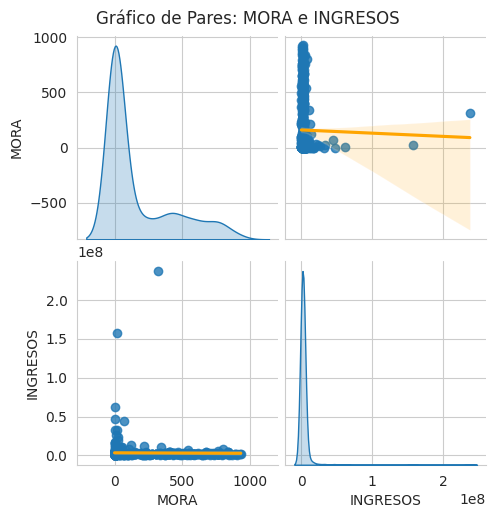

In [ ]:
# Gráfico de pares (pair plot)
sns.pairplot(df[['MORA', 'INGRESOS']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'orange'}})
plt.suptitle('Gráfico de Pares: MORA e INGRESOS', y=1.02)
plt.show()

En la grafica de pares para la variable close y volume donde se puede observar la relación entre estas dos variables y la distribución individual de cada una

Distribuciones Individuales:

Distribución de close:

Se observa en el gráfico ubicado en parte superior izquierda un gráfico de densidad, donde la distribución es asimétrica a la derecha (sesgo positivo), con una gran concentración de la variable close en los rangos bajos, entre aproximadamente 0 y 25,000.
Distribución de volume:

Se evidencia en el gráfico de la parte inferior derecha un grafico de densidad con una distribución de la variable volume, la cual es altamente asimétrica a la derecha, lo que indica que la mayoría de los volúmenes son bajos, con algunos volúmenes extremadamente altos reiterando el comportamiento arrojado por las graficas anteriores.
Relación entre close y volume:

En los gráficos superior derecha e inferior izquierda, se muestra la relación entre la variable close y volume, esta relación muestra ser negativa, aunque no muy fuerte, ya que la línea de regresión (en rojo) tiene una pendiente ligeramente descendente.

Los puntos están concentrados en las zonas de precios bajos y volúmenes bajos, con algunos puntos dispersos en los volúmenes más altos

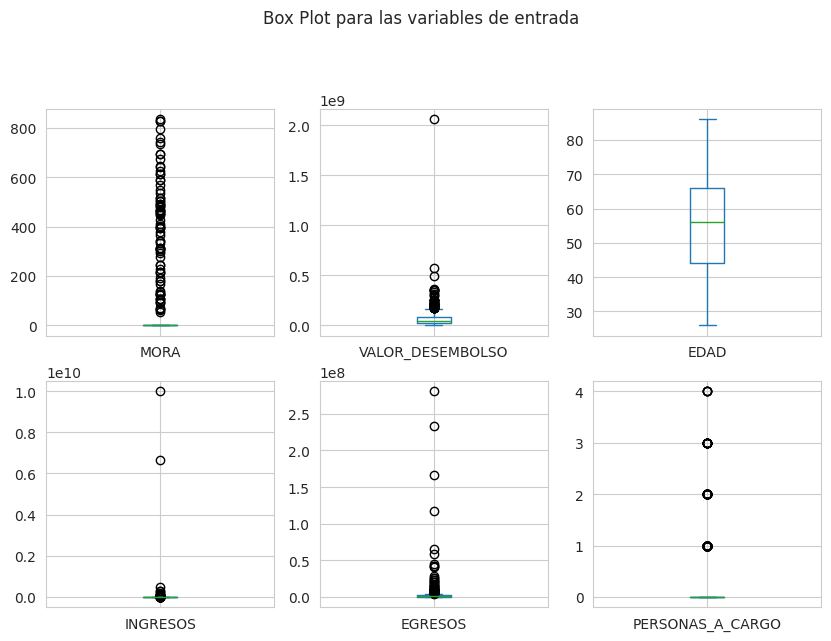

In [ ]:
df.drop('PLAZO', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10), title='Box Plot para las variables de entrada')
#plt.savefig('vino')
plt.show()

# *Dividir los datos en conjuntos de entrenamiento y prueba*

In [ ]:

#Escojamos nuestras variables predictoras (Unicamente variables de naturaleza numérica)

predictores = ['EDAD','INGRESOS','EGRESOS','DEPENDIENTES','PLAZO','SALDO_CREDITO']

#Escojamos que es lo que queremos encontrar
objetivo= 'MORA'

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables que usaremos para encontrar a Y

y= df_clean[objetivo].values
X= df_clean[predictores].values

# Verificar los datos extraídos
print("Variable objetivo (y):", y)
print("Variables predictoras (X):\n", X)


Variable objetivo (y): [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 590.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 743.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 403.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 217. 106.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 229.   0.   0. 210.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 128.   0.   0.   0.
   0. 448.  63.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 797. 340.   0.   0.   0.   0. 612.   0. 567.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 478.
   0. 181.   0.   0.   0.   0.   0. 308. 409.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size=0.2. Esto significa que aproximadamente el 20% de los datos se utilizarán para el conjunto de prueba, y el 80% se utilizarán para el conjunto de entrenamiento

# X_train: Conjunto de datos de características para entrenamiento.
# X_test: Conjunto de datos de características para prueba.
# y_train: Conjunto de datos de objetivos para entrenamiento.
# y_test: Conjunto de datos de objetivos para prueba.

# print(X_train.shape): Muestra la forma del array X_train, es decir, el número de filas y columnas en el conjunto de entrenamiento de características.
# print(X_test.shape): Muestra la forma del array X_test, es decir, el número de filas y columnas en el conjunto de prueba de características.
# print(y_train.shape): Muestra la forma del array y_train, es decir, el número de elementos en el conjunto de entrenamiento de objetivos.
# print(y_test.shape): Muestra la forma del array y_test, es decir, el número de elementos en el conjunto de prueba de objetivos.


print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (482, 6)
Dimensiones de X_test: (121, 6)
Dimensiones de y_train: (482,)
Dimensiones de y_test: (121,)




---


Configurando y entrenando un modelo de regresión logística


---



In [ ]:
# Creamos el modelo
log_reg = LogisticRegression(solver='lbfgs', max_iter=42)

# Aseguramos de que el modelo esté entrenado
log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg.predict(X_test)

# Evaluar el modelo

# accuracy_score(y_test, y_pred): Mide la precisión del modelo, que es la proporción de predicciones correctas sobre el total de predicciones

# confusion_matrix(y_test, y_pred): Proporciona una tabla que muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos
# y falsos negativos. Esto es útil para evaluar el rendimiento del modelo de clasificación

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.8264462809917356
Matriz de confusión:
 [[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluamos el modelo

# El método log_reg.score(X_test, y_test) se utiliza para evaluar el rendimiento del modelo de regresión logística en el conjunto de datos de prueba.
# Este método devuelve la precisión del modelo, que es la proporción de predicciones correctas realizadas por el modelo en comparación con el total de muestras en el conjunto de prueba.

# El método score devuelve un valor entre 0 y 1, que representa la precisión del modelo. Específicamente:

# 1.0: El modelo ha predicho correctamente todas las muestras en el conjunto de prueba.
# 0.0: El modelo no ha realizado ninguna predicción correcta.

accuracy = log_reg.score(X_test, y_test)

# El valor impreso representa la precisión del modelo en el conjunto de datos de prueba.
# Por ejemplo, si el valor es 0.80, esto significa que el modelo predijo correctamente el 80% de las muestras en el conjunto de prueba

print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.8264462809917356


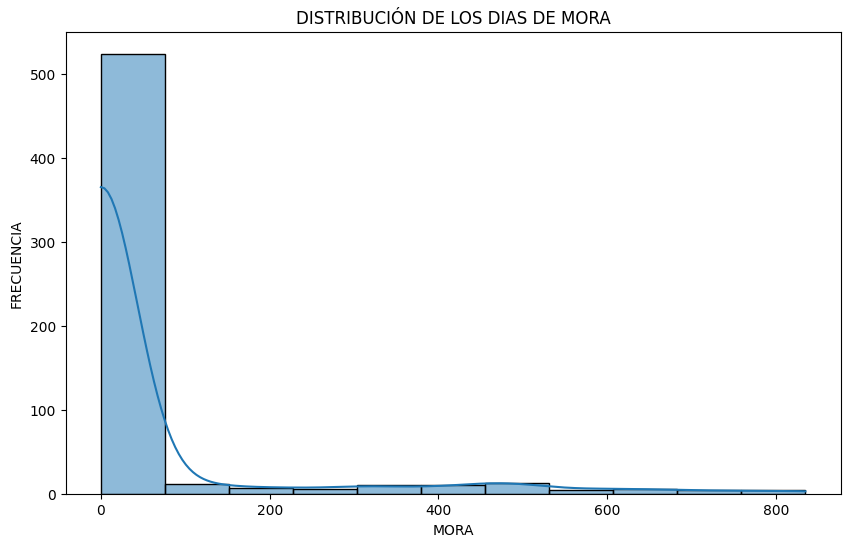

In [ ]:
# GRAFICOS DE RESUMEN UNIVARIADOS

# HISTOGRAMAS

# Muestran los recuentos o frecuencias relativas de los valores que se encuentran en diferentes intervalos o rangos de clase, la forma y la dispersión de datos de muestra continuos.

# Histograma de los dias de mora: muestra la distribución de la variable DIAS DE MORA dividiendola en intervalos, útil para ver la forma de distribución y frecuencia de los valores en cada intervalo
plt.figure(figsize=(10, 6))
sns.histplot(df['MORA'].dropna(), kde=True)
plt.title('DISTRIBUCIÓN DE LOS DIAS DE MORA')
plt.xlabel('MORA')
plt.ylabel('FRECUENCIA')
plt.show()



(array([525.,  12.,  10.,   9.,   9.,  14.,   7.,   7.,   5.,   5.]),
 array([  0. ,  83.5, 167. , 250.5, 334. , 417.5, 501. , 584.5, 668. ,
        751.5, 835. ]),
 <BarContainer object of 10 artists>)

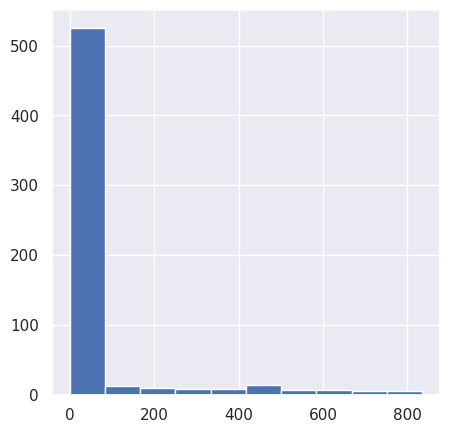

In [ ]:
plt.hist(df['MORA'])

<Axes: xlabel='CATEGORIA INGRESOS'>

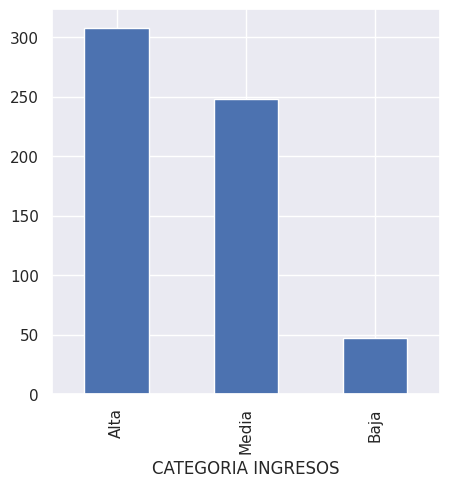

In [ ]:
df['CATEGORIA INGRESOS'].value_counts().plot.bar()

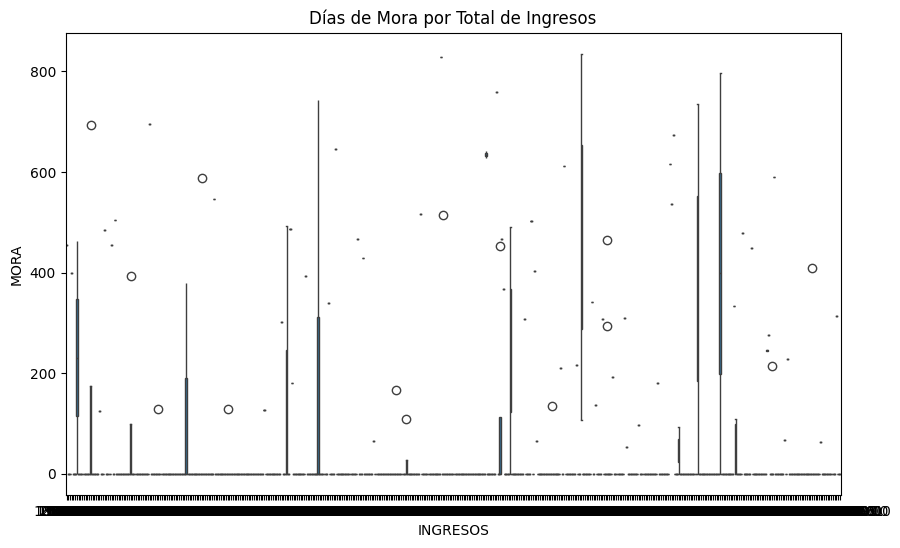

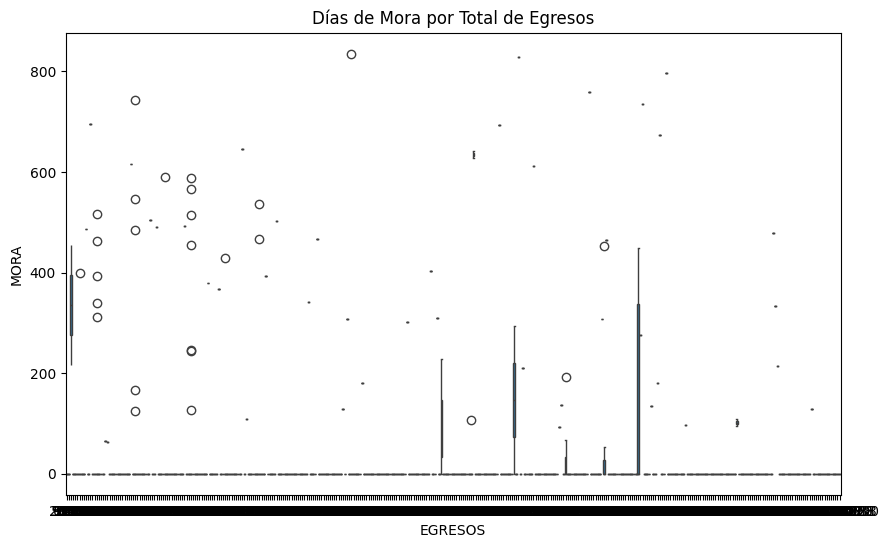

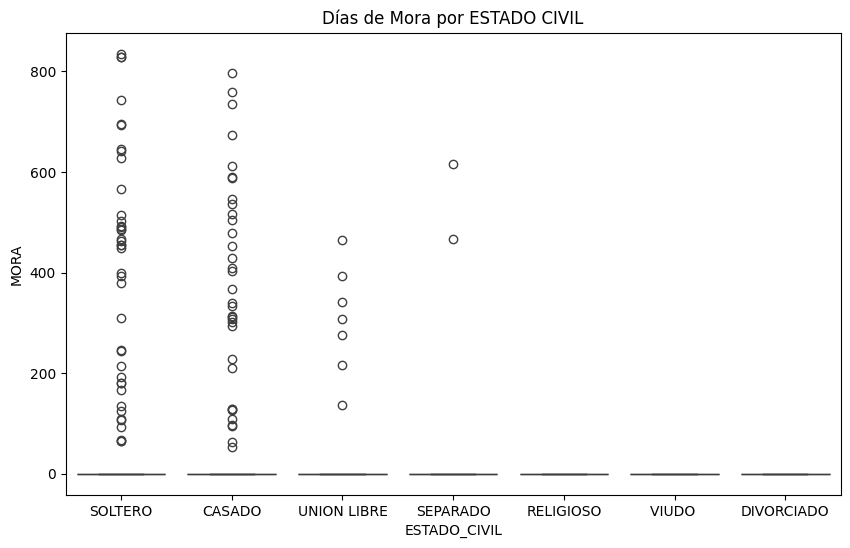

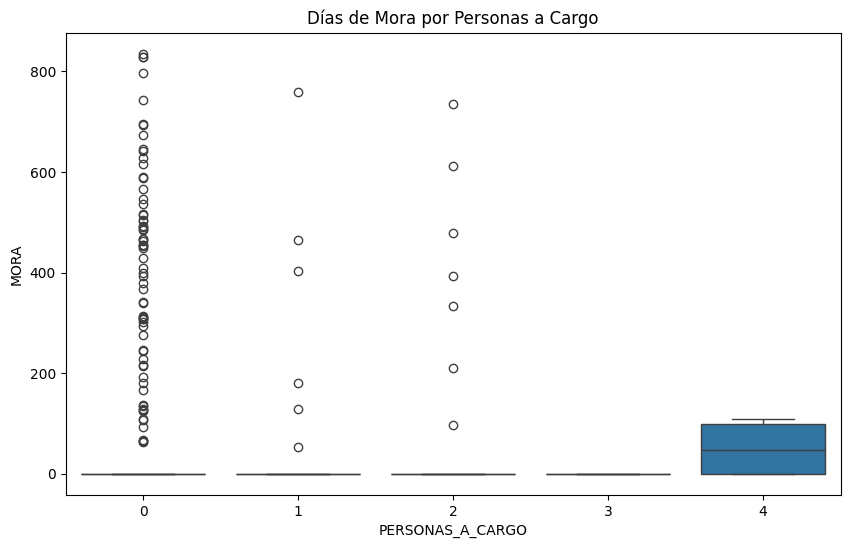

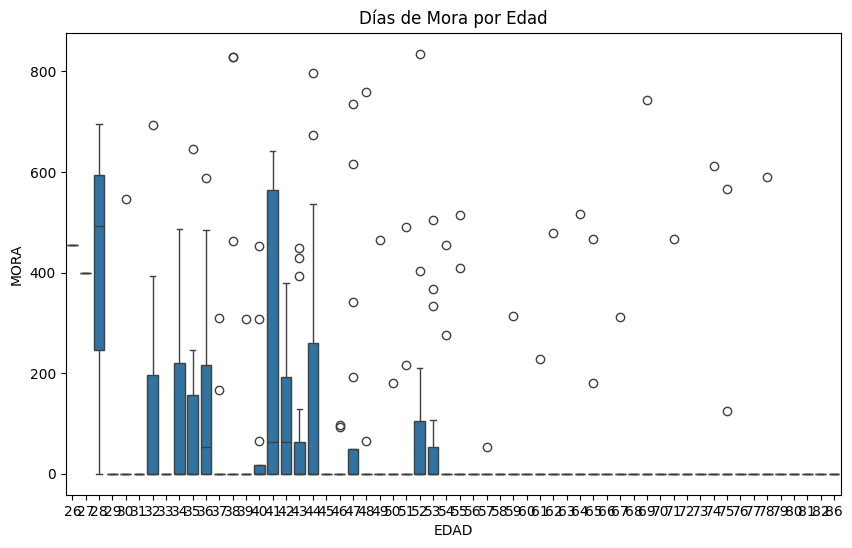

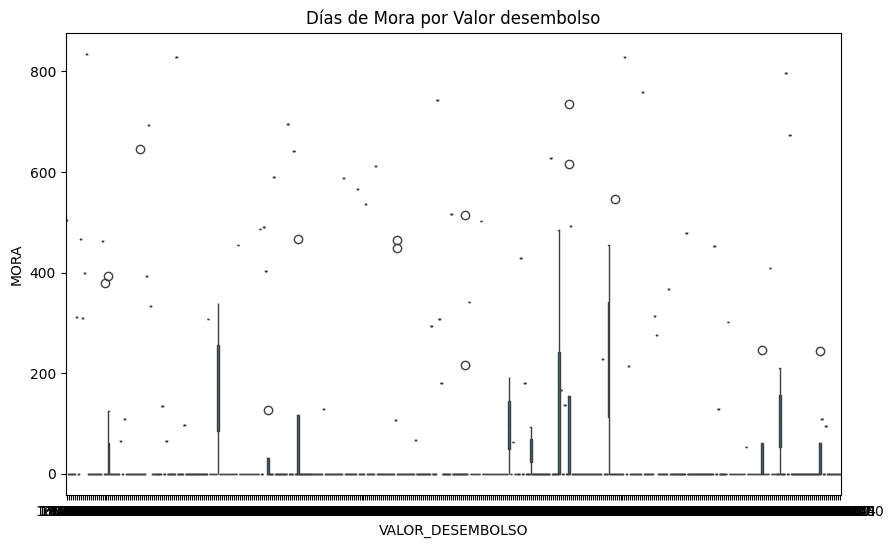

In [ ]:
# Analizar cómo los días de mora varían en función de otras variables
# El boxplot muestra la distribución de datos mediante cuartiles y destaca los valores atípicos. Es útil para observar la dispersión y la simetría de los datos

# Boxplot de días de mora por Ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='INGRESOS', y='MORA', data=df)
plt.title('Días de Mora por Total de Ingresos')
plt.xlabel('INGRESOS')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Egresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='EGRESOS', y='MORA', data=df)
plt.title('Días de Mora por Total de Egresos')
plt.xlabel('EGRESOS')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Estado Civil
plt.figure(figsize=(10, 6))
sns.boxplot(x='ESTADO_CIVIL', y='MORA', data=df)
plt.title('Días de Mora por ESTADO CIVIL')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Personas a Cargo
plt.figure(figsize=(10, 6))
sns.boxplot(x='PERSONAS_A_CARGO', y='MORA', data=df)
plt.title('Días de Mora por Personas a Cargo')
plt.xlabel('PERSONAS_A_CARGO')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Edad
plt.figure(figsize=(10, 6))
sns.boxplot(x='EDAD', y='MORA', data=df)
plt.title('Días de Mora por Edad')
plt.xlabel('EDAD')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por valor desembolso
plt.figure(figsize=(10, 6))
sns.boxplot(x='VALOR_DESEMBOLSO', y='MORA', data=df)
plt.title('Días de Mora por Valor desembolso')
plt.xlabel('VALOR_DESEMBOLSO')
plt.ylabel('MORA')
plt.show()

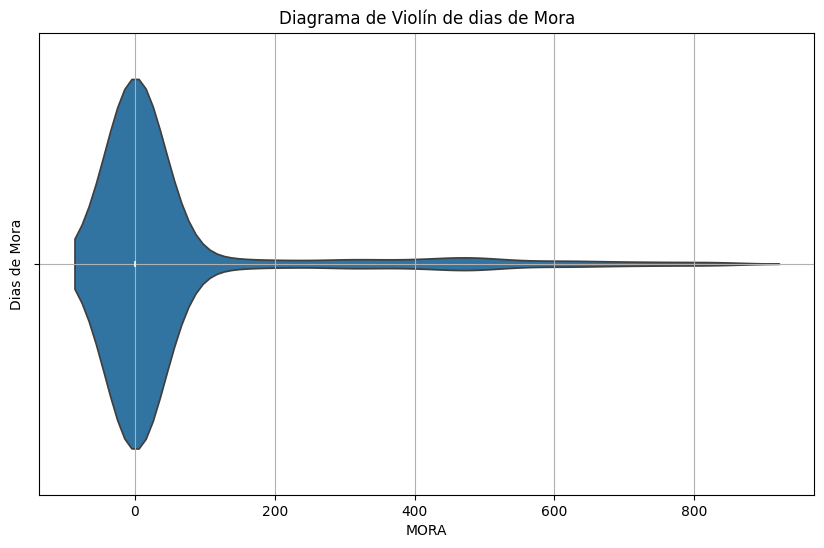

In [ ]:
# TRAMAS DE VIOLIN

# Diagrama de violin
# Un diagrama de violín combina un histograma y un diagrama de caja para mostrar la distribución de los datos y su densidad

plt.figure(figsize=(10, 6))
sns.violinplot(x=df_clean['MORA'])
plt.title('Diagrama de Violín de dias de Mora')
plt.ylabel('Dias de Mora')
plt.grid(True)
plt.show()

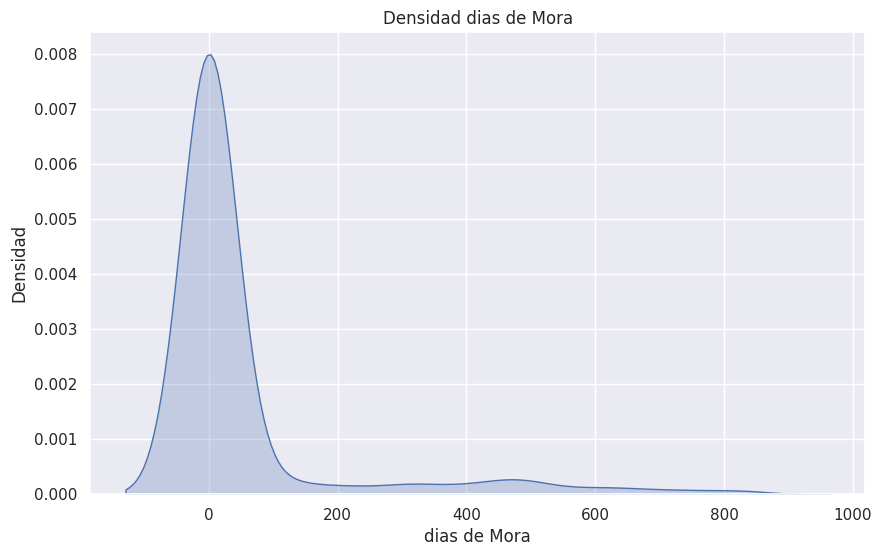

In [ ]:
# El gráfico de densidad muestra la distribución de una variable continua

plt.figure(figsize=(10, 6))
sns.kdeplot(df['MORA'], fill=True)
plt.title('Densidad dias de Mora')
plt.xlabel('dias de Mora')
plt.ylabel('Densidad')
plt.show()

In [ ]:
# Visualizamos la siguiente gráfica de dispersión considerando la categoria de ingresos
# Diferencia los valores de los datos por sus categorías y asigna diferentes colores según la variable de agrupación proporcionada como entrada

sns.scatterplot(x=df_clean.index,y=df_clean['MORA'],hue=df_clean['CATEGORIA INGRESOS'])


NameError: name 'df_clean' is not defined

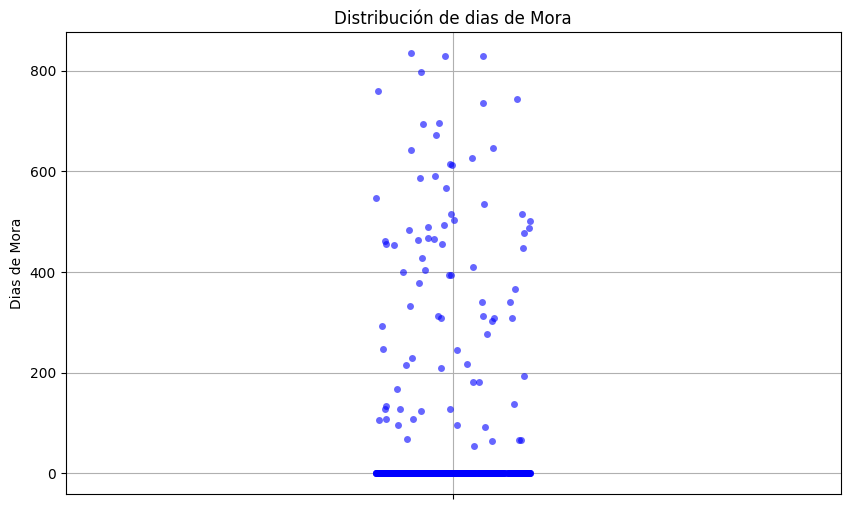

In [ ]:
# GRAFICO DE BANDAS.

# Se utiliza para visualizar la distribución de puntos de datos de la variable

plt.figure(figsize=(10, 6))

# Crear un gráfico de strip plot
sns.stripplot(y=df_clean['MORA'], jitter=True, color='blue', alpha=0.6)

# Etiquetas y título
plt.title('Distribución de dias de Mora')
plt.ylabel('Dias de Mora')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


<Axes: xlabel='EDAD', ylabel='CATEGORIA INGRESOS'>

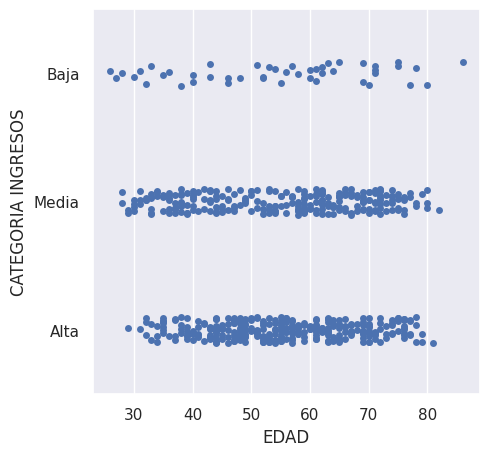

In [ ]:
# Grafico de Bandas, dispersión Horizontal

# Strip-plot(category wise)
sns.stripplot(x=df_clean['EDAD'],y=df_clean['CATEGORIA INGRESOS'])

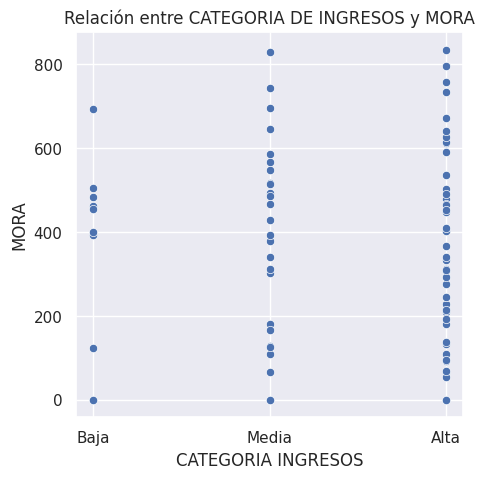

In [ ]:

# Gráfico de dispersión para visualizar la relación entre 'CATEGORIA INGRESOS' y 'MORA'
sns.scatterplot(x='CATEGORIA INGRESOS', y='MORA', data=df_clean)
plt.title('Relación entre CATEGORIA DE INGRESOS y MORA')
plt.xlabel('CATEGORIA INGRESOS')
plt.ylabel('MORA')
plt.show()

<Axes: xlabel='EDAD', ylabel='CATEGORIA INGRESOS'>

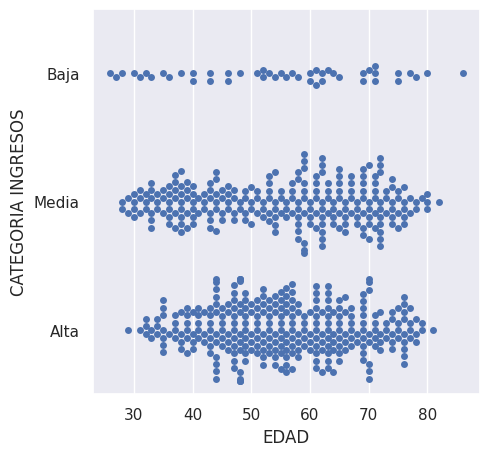

In [ ]:
# TRAMA DE ENJAMBRE

# Dispersa automáticamente los puntos de datos de la variable para evitar la superposición y, por lo tanto, proporciona una mejor visión general de los datos.

#Setting figure size
sns.set(rc={'figure.figsize':(5,5)})
#Swarm-plot
sns.swarmplot(x=df_clean['EDAD'], y=df_clean['CATEGORIA INGRESOS'])

<ipython-input-125-20d7cae31287>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df_clean.groupby('CATEGORIA INGRESOS'):


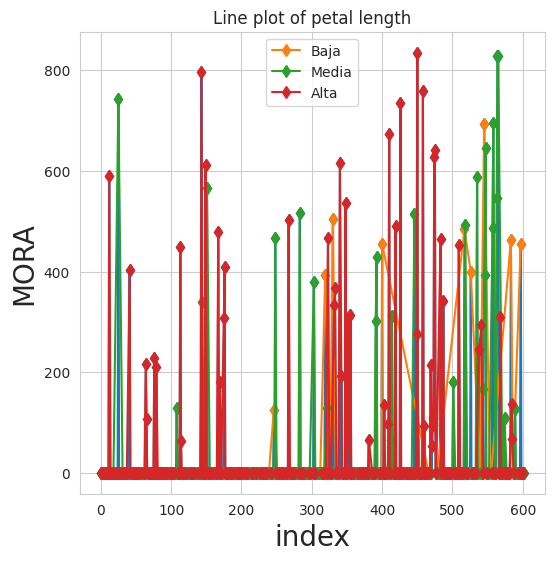

In [ ]:
# GRAFICO LINEAL (CON MARCADORES)

# visualiza los datos conectando los puntos de datos mediante segmentos de línea. Se parece a un gráfico de dispersión, pero se diferencia en que los puntos de medición están ordenados
# (normalmente por su valor en el eje x) y conectados con segmentos de línea recta.

plt.figure(figsize=(6,6))
plt.title('Line plot of petal length')
plt.xlabel('index',fontsize=20)
plt.ylabel('MORA',fontsize=20)
plt.plot(df_clean.index,df_clean['MORA'],markevery=1,marker='d')
for name, group in df_clean.groupby('CATEGORIA INGRESOS'):
    plt.plot(group.index, group['MORA'], label=name,markevery=1,marker='d')
plt.legend()
plt.show()

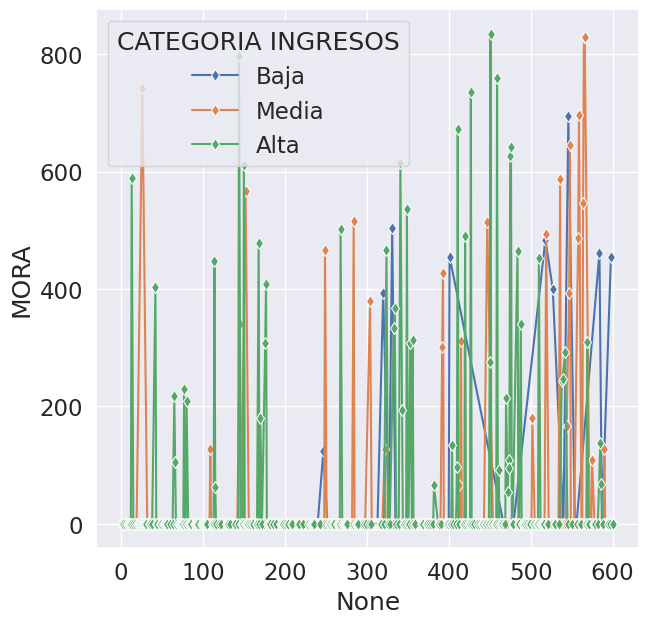

In [ ]:
# Otro ejemplo de grafico lineal por categoria de ingresos

sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

fig=sns.lineplot(x=df_clean.index,y=df_clean['MORA'],markevery=1,marker='d',data=df_clean,hue=df_clean['CATEGORIA INGRESOS'])
#fig.set(xlabel='INGRESOS')

In [ ]:
Con esta gráfica podemos observar valores atípicos (outliers) que podrían indicar casos de morosidad extrema que son importantes para la modelización

In [43]:
# Analizar cómo los días de mora varían en función de otras variables
# El boxplot muestra la distribución de datos mediante cuartiles y destaca los valores atípicos. Es útil para observar la dispersión y la simetría de los datos

# Boxplot de días de mora por Ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='INGRESOS', y='MORA', data=df_clean)
plt.title('Días de Mora por Ingresos')
plt.xlabel('INGRESOS')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Egresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='EGRESOS', y='MORA', data=df_clean)
plt.title('Días de Mora por Egresos')
plt.xlabel('EGRESOS')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Estado Civil
plt.figure(figsize=(10, 6))
sns.boxplot(x='ESTADO_CIVIL', y='MORA', data=df_clean)
plt.title('Días de Mora por ESTADO CIVIL')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Personas a Cargo
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEPENDIENTES', y='MORA', data=df_clean)
plt.title('Días de Mora por Personas a Cargo')
plt.xlabel('DEPENDIENTES')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEXO', y='MORA', data=df_clean)
plt.title('Días de Mora por SEXO')
plt.xlabel('SEXO')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por plazo
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLAZO', y='MORA', data=df_clean)
plt.title('Días de Mora por PLAZO')
plt.xlabel('PLAZO')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por saldo
plt.figure(figsize=(10, 6))
sns.boxplot(x='SALDO_CREDITO', y='MORA', data=df_clean)
plt.title('Días de Mora por SALDO')
plt.xlabel('SALDO_CREDITO')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por edad
plt.figure(figsize=(10, 6))
sns.boxplot(x='EDAD', y='MORA', data=df_clean)
plt.title('Días de Mora por EDAD')
plt.xlabel('EDAD')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por clasificacion mora
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLASIFICACION_MORA', y='MORA', data=df_clean)
plt.title('Días de Mora por CLASIFICACION_MORA')
plt.xlabel('CLASIFICACION_MORA')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por tipo de vivienda
plt.figure(figsize=(10, 6))
sns.boxplot(x='VIVIENDA', y='MORA', data=df_clean)
plt.title('Días de Mora por Tipo de vivienda')
plt.xlabel('VIVIENDA')
plt.ylabel('MORA')
plt.show()

NameError: name 'df_clean' is not defined

<Figure size 1000x600 with 0 Axes>

# ***CONCLUSIONES DEL ANALISIS UNIVARIADO***